In [1]:
!python -m venv my_env

In [1]:
import numpy as np
import pandas as pd
import datatable as dt
from datatable import f
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, det_curve
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

import scipy
import statsmodels
import keras
import nltk
import torch
import tensorflow
import pipe
import pprint
import random

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kevin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\kevin\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\kevin\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\kevin\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\kevin\anaconda3\lib\site-pack

AttributeError: _ARRAY_API not found

In [2]:
df = pd.read_csv('simulated_data.csv')
df.tail()

id diagnosis   area_mean  area_worst  compactness_mean  \
14272  92751         B  164.130895  164.130895          0.045051   
14273  92751         B  201.310953  201.310953          0.040230   
14274  92751         B  171.792439  171.792439          0.045287   
14275  92751         B  168.373681  168.373681          0.036249   
14276  92751         B  164.705799  164.705799          0.039615   

       compactness_worst  concave points_mean  concave points_worst  \
14272           0.045051                  0.0                   0.0   
14273           0.040230                  0.0                   0.0   
14274           0.045287                  0.0                   0.0   
14275           0.036249                  0.0                   0.0   
14276           0.039615                  0.0                   0.0   

       concavity_mean  concavity_worst  fractal_dimension_mean  \
14272             0.0              0.0                0.056146   
14273             0.0              0.0                0.057780   
14274             0.0              0.0                0.060658   
14275             0.0              0.0                0.058009   
14276             0.0              0.0                0.060972   

       fractal_dimension_worst  perimeter_mean  perimeter_worst  radius_mean  \
14272                 0.056146       45.892093        45.892093     7.789452   
14273                 0.057780       50.638020        50.638020     7.861976   
14274                 0.060658       46.727636        46.727636     7.306300   
14275                 0.058009       51.212123        51.212123     8.162515   
14276                 0.060972       45.776702        45.776702     7.811408   

       radius_worst  smoothness_mean  smoothness_worst  symmetry_mean  \
14272      7.789452         0.055194          0.055194       0.170003   
14273      7.861976         0.042708          0.042708       0.164168   
14274      7.306300         0.059848          0.059848       0.153404   
14275      8.162515         0.057474          0.057474       0.101048   
14276      7.811408         0.047629          0.047629       0.189983   

       symmetry_worst  texture_mean  texture_worst test_group  
14272        0.170003     24.873812      24.873812      train  
14273        0.164168     26.296062      26.296062      train  
14274        0.153404     25.429555      25.429555      train  
14275        0.101048     27.657507      27.657507      train  
14276        0.189983     23.555447      23.555447      train

In [3]:
columns_for_model = [col for col in df.columns.tolist() if '_mean' in col]
X_train = df[df.test_group == 'train'][columns_for_model]
X_test = df[df.test_group == 'test'][columns_for_model]
y_train = df[df.test_group == 'train'].diagnosis
y_test = df[df.test_group == 'test'].diagnosis

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
base_model = SVC(random_state=55, probability=True, C=0.01, degree=1, max_iter=-1, gamma=1, kernel='linear')

param_grid = {
#     'C': [0.01, 1.0, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.01, 1.0, 100],
#     'degree': [1, 2, 3],
#     'max_iter': [-1, 10, 50]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=SVC(C=0.01, degree=1, gamma=1, kernel='linear',
                           probability=True, random_state=55),
             n_jobs=-1,
             param_grid={'gamma': [0.01, 1.0, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [6]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('mean_test_score', ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_gamma  \
0        3.473010      0.439567         0.115662        0.024887         0.01   
8        3.085939      0.197980         0.103277        0.017460       100.00   
5        3.899373      0.630682         0.119696        0.020820         1.00   
4        3.546896      0.348327         0.100313        0.010657         1.00   
9        4.934450      0.675392         0.118851        0.027637       100.00   
2       14.598079      1.347715         1.174241        0.146939         0.01   
1        9.889394      0.399658         0.293044        0.037247         0.01   
3       12.832271      0.897129         0.445571        0.085555         0.01   
7       11.042331      0.801975         0.293233        0.056656         1.00   
11       6.608135      0.588485         0.171913        0.011481       100.00   
6       21.637764      1.028726         1.922103        0.262344         1.00   
10      34.634300      0.594997         2.362848        0.232708       100.00   

   param_kernel                                params  split0_test_score  \
0        linear   {'gamma': 0.01, 'kernel': 'linear'}           0.877078   
8        linear    {'gamma': 100, 'kernel': 'linear'}           0.877078   
5          poly      {'gamma': 1.0, 'kernel': 'poly'}           0.877078   
4        linear    {'gamma': 1.0, 'kernel': 'linear'}           0.877078   
9          poly      {'gamma': 100, 'kernel': 'poly'}           0.882765   
2           rbf      {'gamma': 0.01, 'kernel': 'rbf'}           0.849519   
1          poly     {'gamma': 0.01, 'kernel': 'poly'}           0.824584   
3       sigmoid  {'gamma': 0.01, 'kernel': 'sigmoid'}           0.824147   
7       sigmoid   {'gamma': 1.0, 'kernel': 'sigmoid'}           0.783465   
11      sigmoid   {'gamma': 100, 'kernel': 'sigmoid'}           0.768591   
6           rbf       {'gamma': 1.0, 'kernel': 'rbf'}           0.643045   
10          rbf       {'gamma': 100, 'kernel': 'rbf'}           0.643045   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.925634           0.952318           0.940044   
8            0.925634           0.952318           0.940044   
5            0.925634           0.952318           0.940044   
4            0.925634           0.952318           0.940044   
9            0.926072           0.951006           0.936543   
2            0.897200           0.923010           0.927352   
1            0.877078           0.895451           0.915974   
3            0.877078           0.895451           0.915974   
7            0.870516           0.849519           0.886652   
11           0.829396           0.847332           0.854267   
6            0.643482           0.643482           0.643326   
10           0.643482           0.643482           0.643326   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.913348         0.921684        0.025886                1  
8            0.913348         0.921684        0.025886                1  
5            0.913348         0.921684        0.025886                1  
4            0.913348         0.921684        0.025886                1  
9            0.910722         0.921421        0.023385                5  
2            0.942232         0.907863        0.032583                6  
1            0.940919         0.890801        0.039345                7  
3            0.940919         0.890714        0.039492                8  
7            0.870460         0.852122        0.036298                9  
11           0.846389         0.829195        0.031388               10  
6            0.643326         0.643332        0.000160               11  
10           0.643326         0.643332        0.000160               11

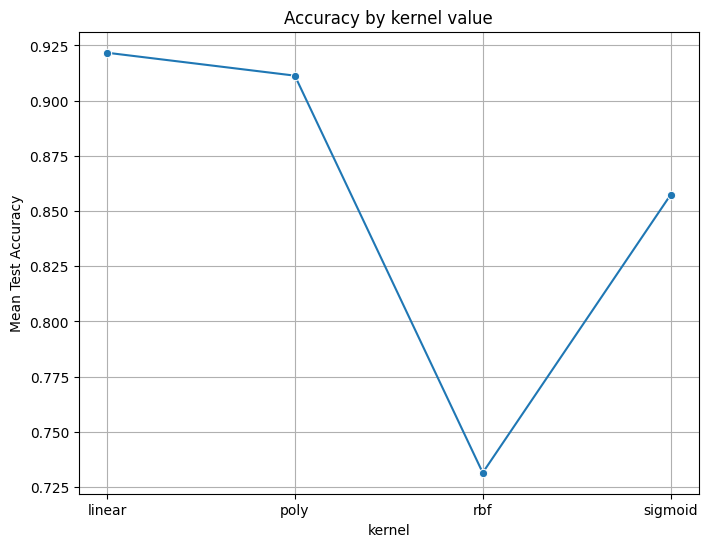

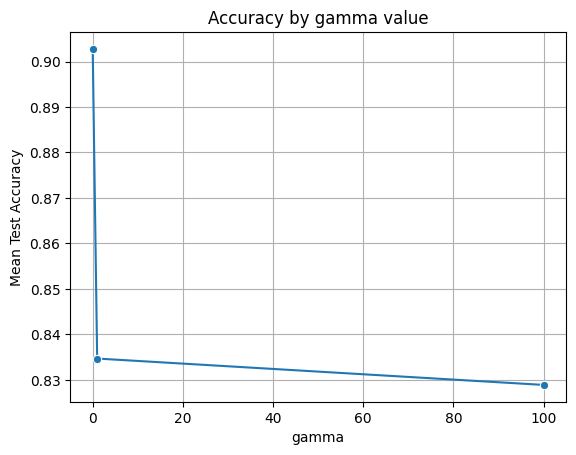

In [9]:
plt.figure(figsize=(8, 6))

for param in param_grid.keys():
    sns.lineplot(data=results.groupby('param_' + param, as_index=False).agg({'mean_test_score':'mean'}), 
                 x='param_' + param, y='mean_test_score', marker='o')
    plt.title('Accuracy by ' + param + ' value')
    plt.xlabel(param)
    plt.ylabel('Mean Test Accuracy')
    plt.grid(True)
    plt.show()

# Creating and examining the simplest model

In [4]:
simple_model = SVC(random_state=55, probability=True, C=0.01, degree=1, max_iter=-1, gamma=0.01, kernel='linear')
simple_model.fit(X_train_scaled, y_train)

SVC(C=0.01, degree=1, gamma=0.01, kernel='linear', probability=True,
    random_state=55)

## Evaluating the accuracy on the training data

In [5]:
predictions = simple_model.predict(X_train_scaled)
prediction_probs = simple_model.predict_proba(X_train_scaled)

print(f'Accuracy: {accuracy_score(y_train, predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(simple_model, X_train_scaled, y_train, cv=5))}')

Accuracy: 0.9280714035701785
Avg CV accuracy: 0.9216844612147769


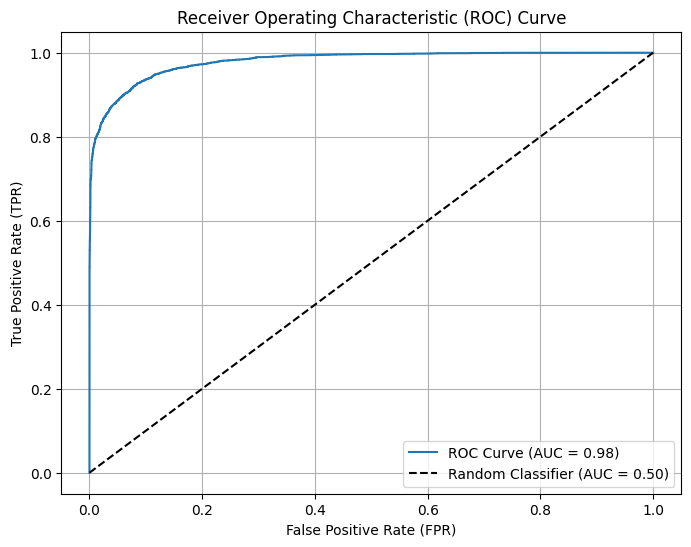

In [6]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
prediction_probs_binary = [x[1] for x in prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

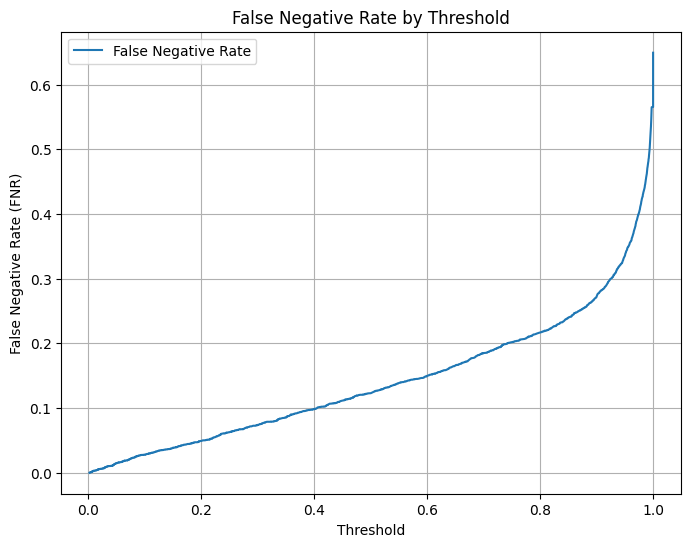

In [7]:
fpr, fnr, thresholds = det_curve(y_train_binary, prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

## Examing the false positives and false negatives

In [8]:
prediction_df = pd.DataFrame({'diagnosis': y_train, 
                              'prediction' : predictions,
                              'M_probability': [x[1] for x in prediction_probs],
                              'prediction_probability': [np.max([x[0], x[1]]) for x in prediction_probs]})

prediction_df['prediction_accuracy'] = 'TP'
prediction_df.loc[(prediction_df.diagnosis == 'B') & (prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'TN'
prediction_df.loc[(prediction_df.diagnosis == 'B') & (prediction_df.prediction == 'M'), 'prediction_accuracy'] = 'FP'
prediction_df.loc[(prediction_df.diagnosis == 'M') & (prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'FN'

grouped_by_accuracy = prediction_df.groupby('prediction_accuracy', as_index=False)
predictions_by_accuracy = grouped_by_accuracy['prediction_probability'].agg(['mean', 'std'])
predictions_by_accuracy['lower_bound'] = predictions_by_accuracy['mean'] - 1.96*predictions_by_accuracy['std']
predictions_by_accuracy['upper_bound'] = predictions_by_accuracy['mean'] + 1.96*predictions_by_accuracy['std']

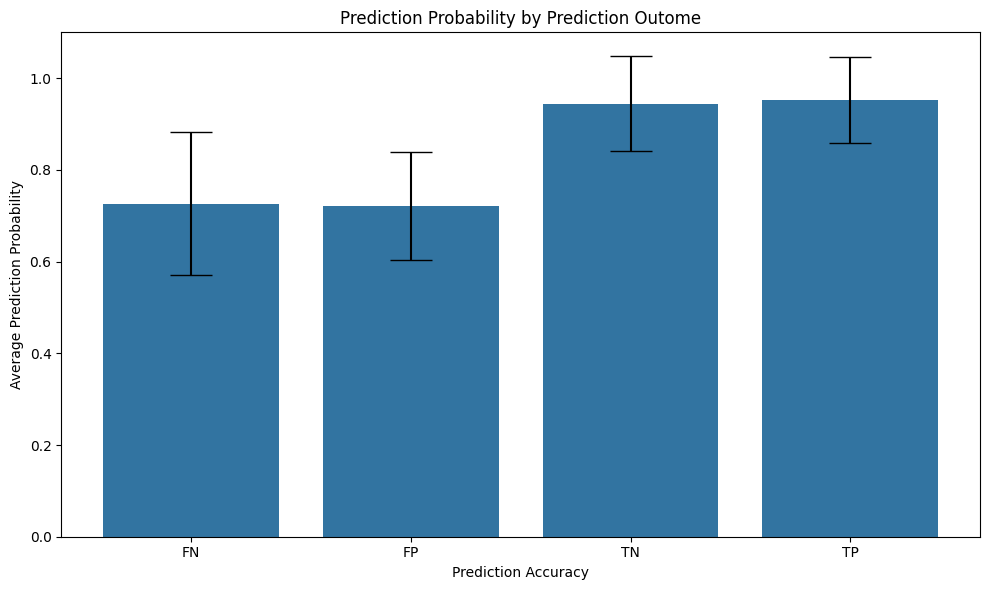

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='prediction_accuracy', y='mean', 
            data=predictions_by_accuracy)
plt.errorbar(x='prediction_accuracy', y='mean', yerr='std', fmt='none',
             data=predictions_by_accuracy, capsize=15, ecolor='k')
plt.title('Prediction Probability by Prediction Outome')
plt.xlabel('Prediction Accuracy')
plt.ylabel('Average Prediction Probability')
plt.tight_layout()
plt.show()

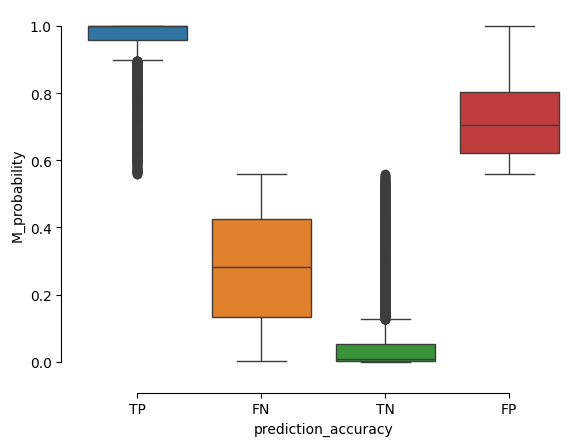

In [10]:
sns.boxplot(x="prediction_accuracy", y='M_probability',
            hue="prediction_accuracy",
            data=prediction_df)
sns.despine(offset=10, trim=True)
plt.show()

## Graphing feature importance

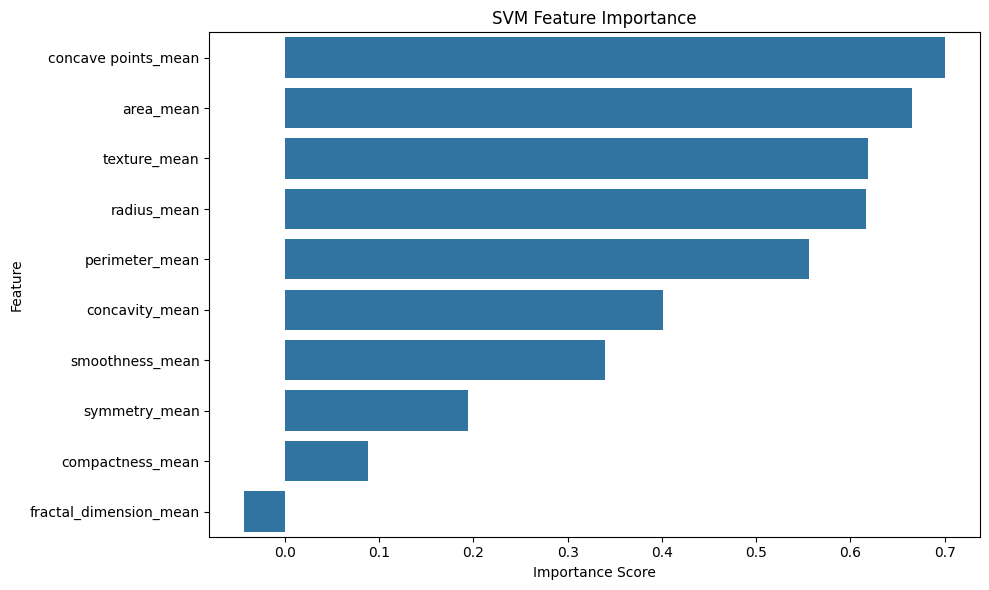

In [11]:
importances = simple_model.coef_
feature_importance_df = pd.DataFrame({'feature': columns_for_model, 'importance': importances[0]})\
    .sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('SVM Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Feature Engineering

In [12]:
predictions_wide = prediction_df.merge(X_train, left_index=True, right_index=True, how='inner')

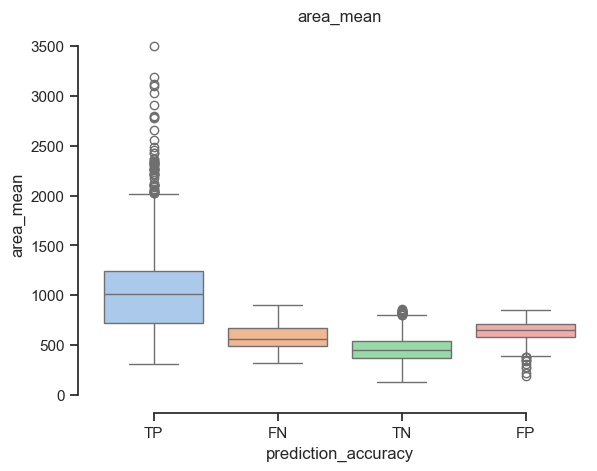

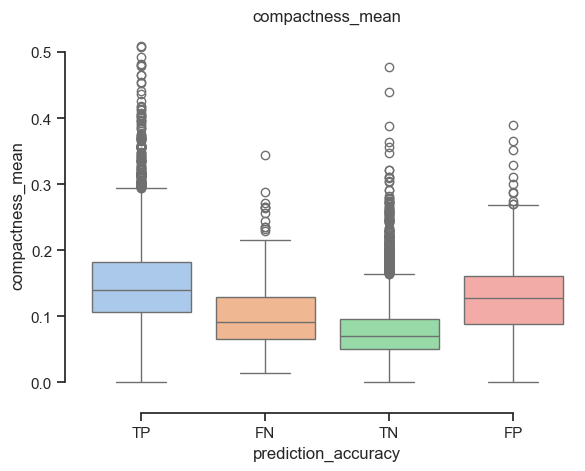

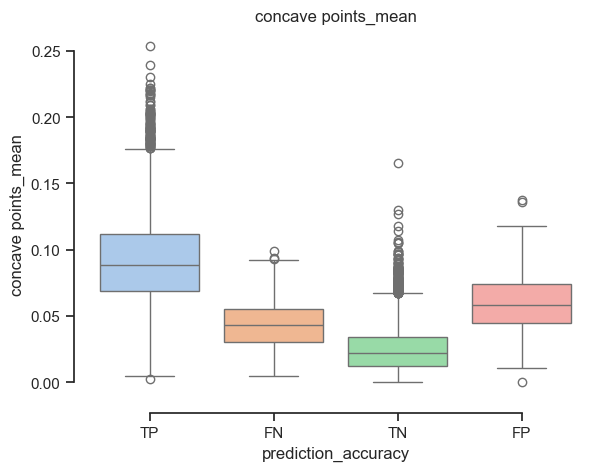

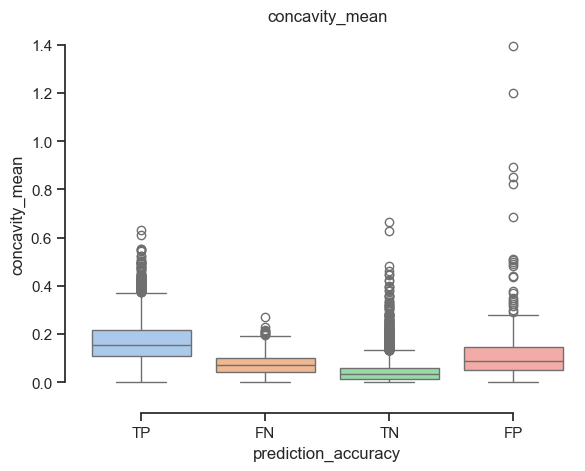

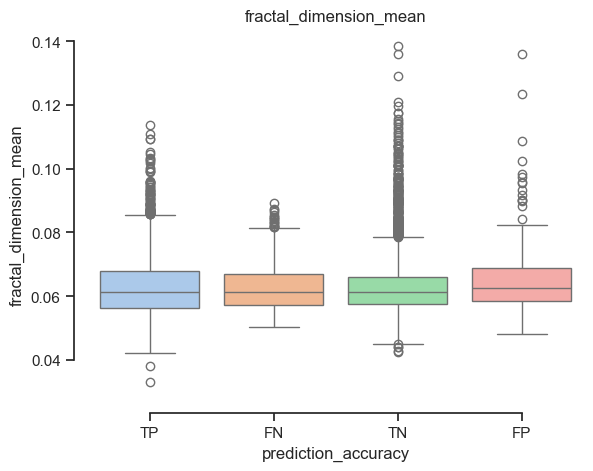

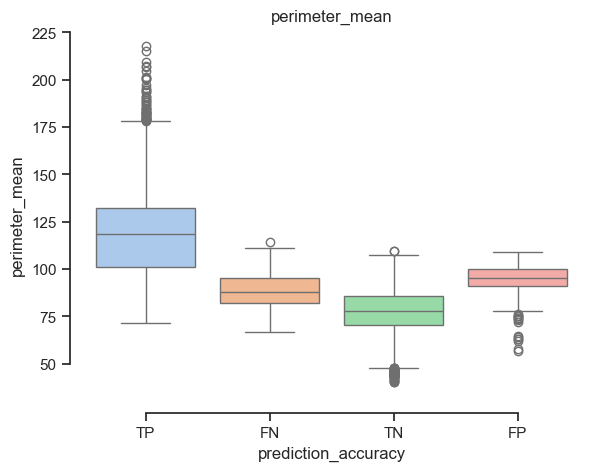

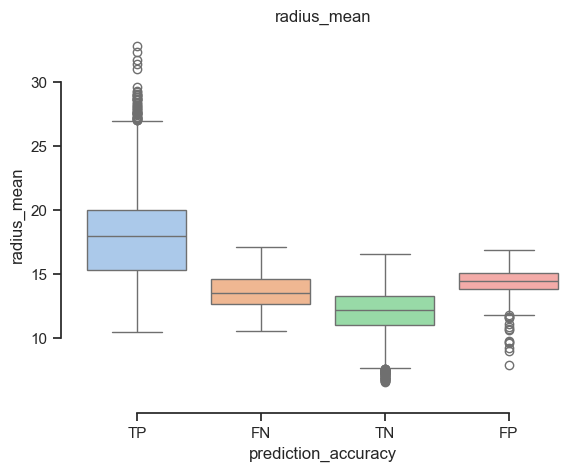

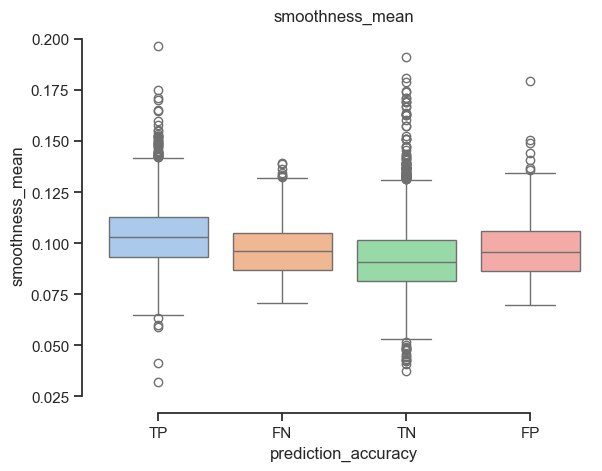

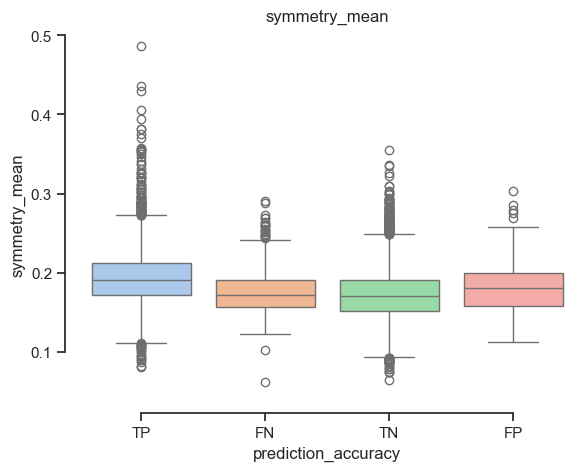

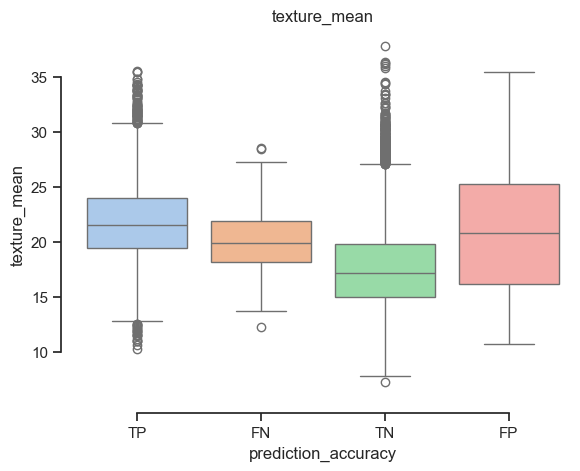

In [13]:
sns.set_theme(style="ticks", palette="pastel")
input_columns = predictions_wide.columns[5:].tolist()
input_columns.sort()

for col in input_columns:
# Draw a nested boxplot to show bills by day and time
    sns.boxplot(x='prediction_accuracy', y=col,
                hue='prediction_accuracy',
                data=predictions_wide)
    sns.despine(offset=10, trim=True)
    plt.title(f"{col}")
    plt.show()

 - area, perimeter, and radius could all be squared

## Looking at feature correlation

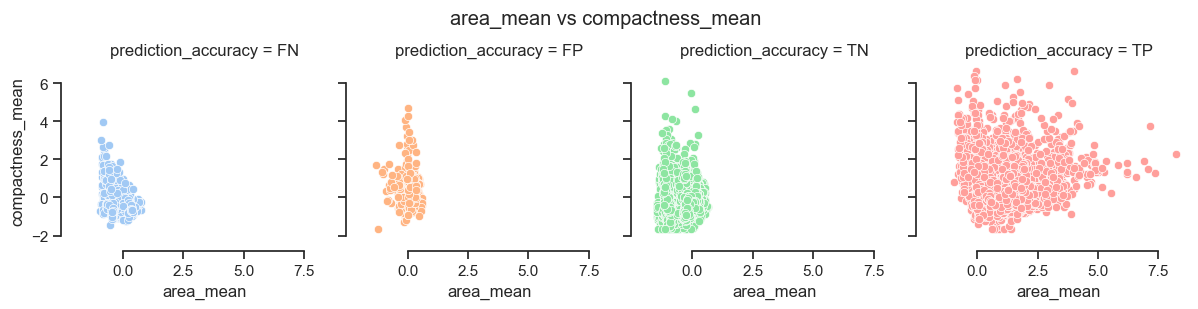

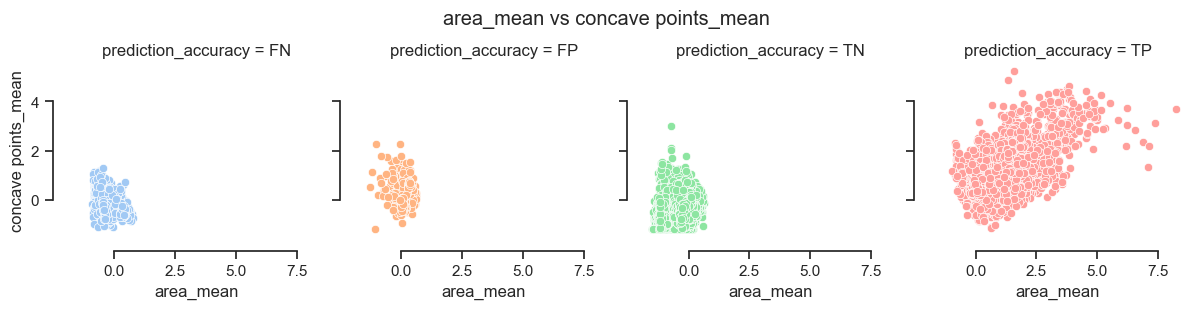

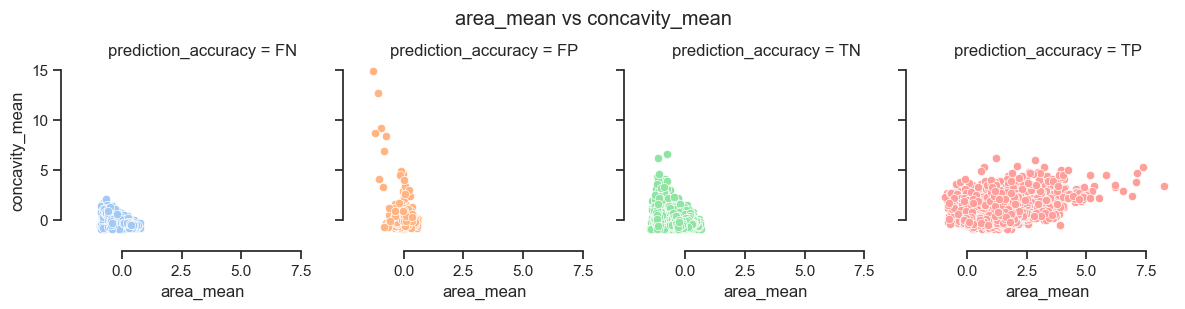

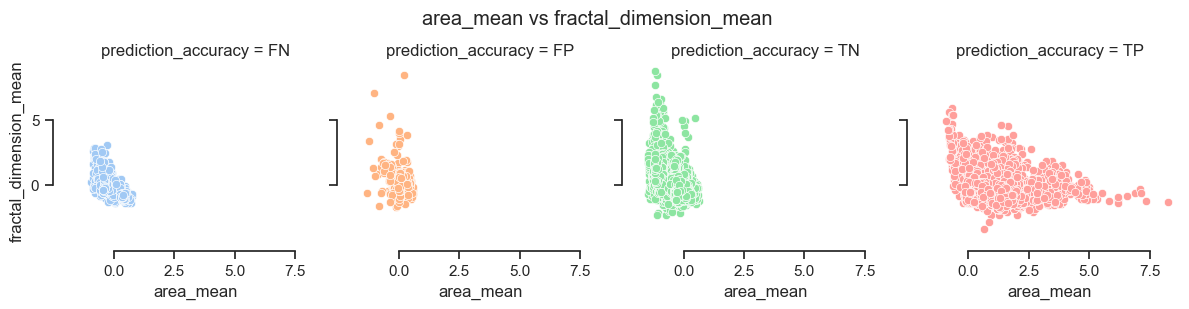

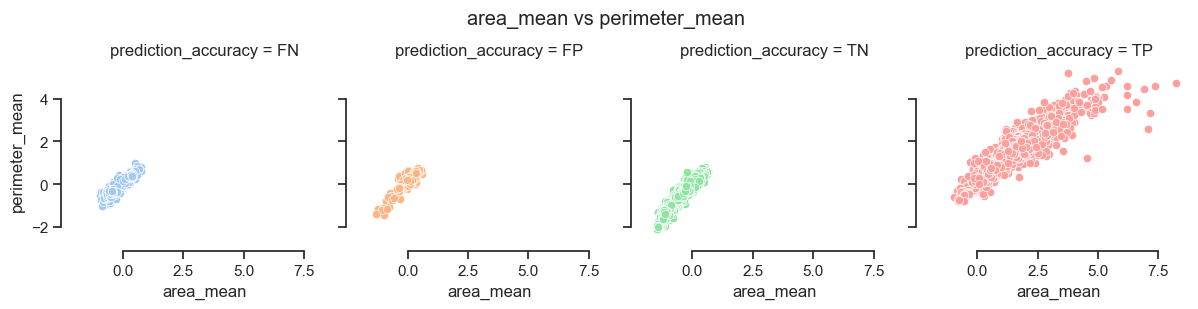

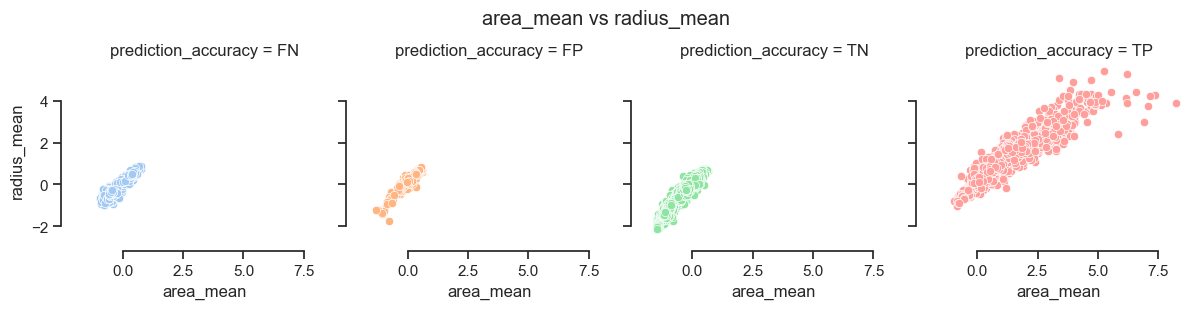

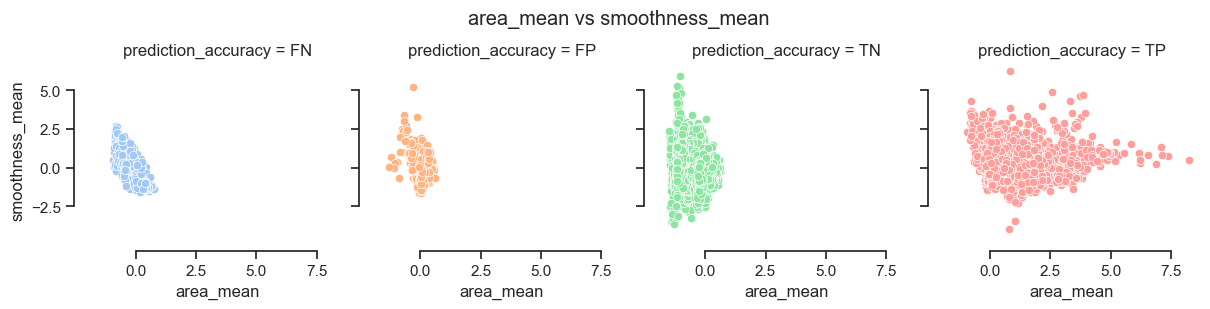

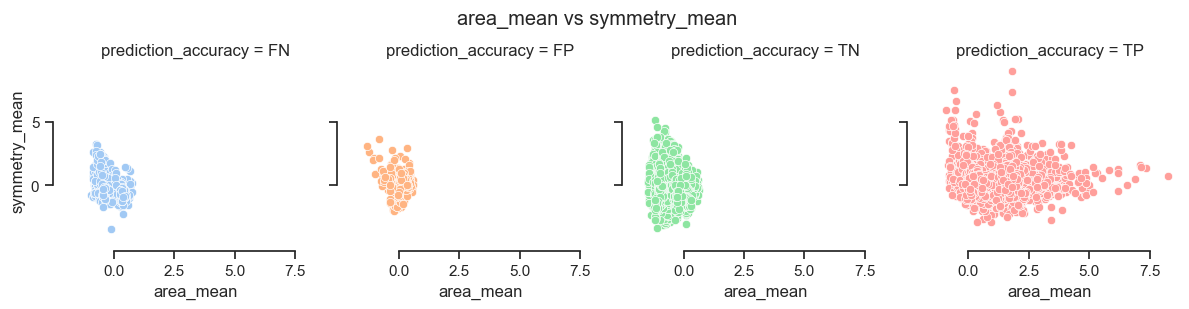

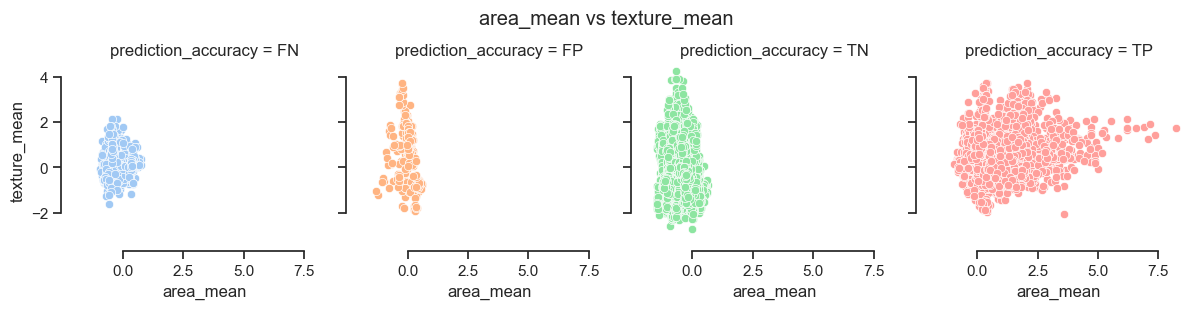

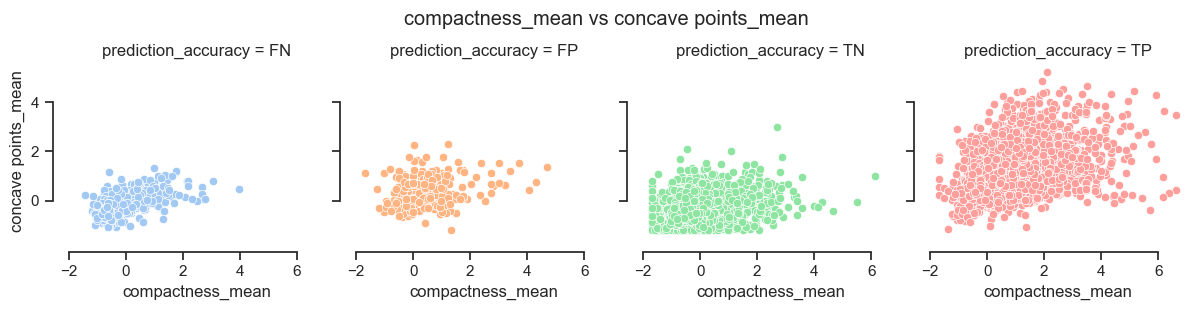

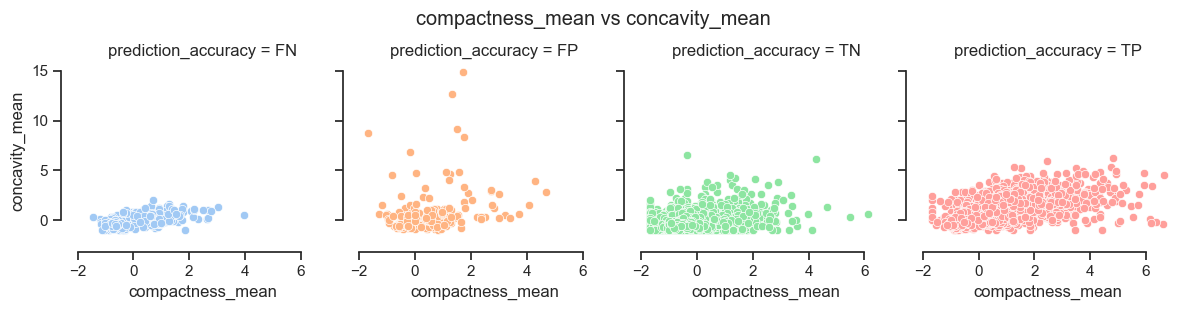

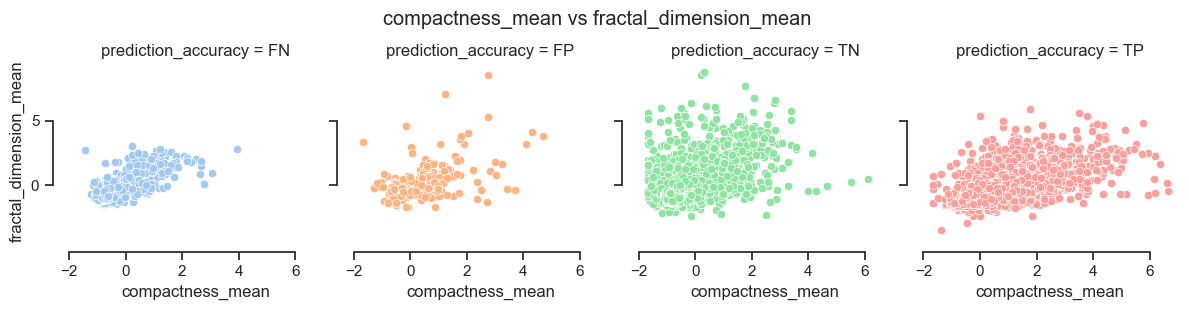

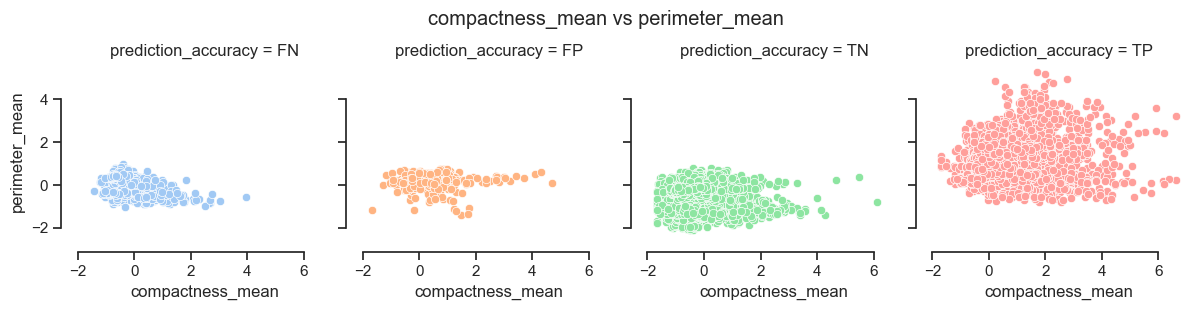

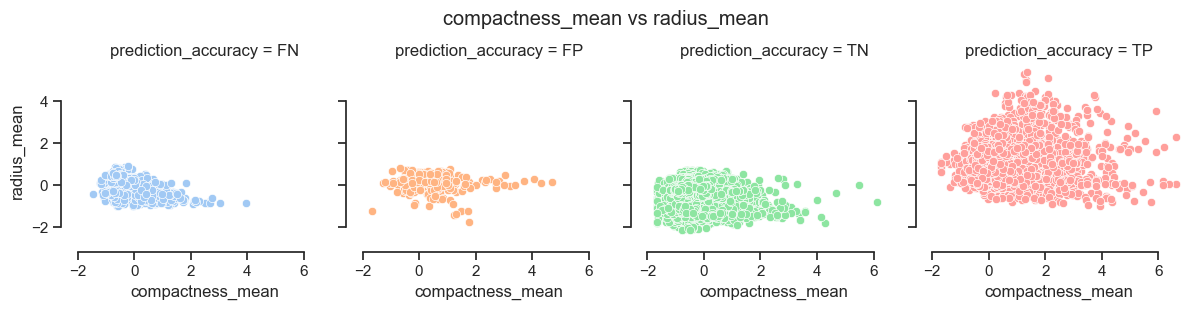

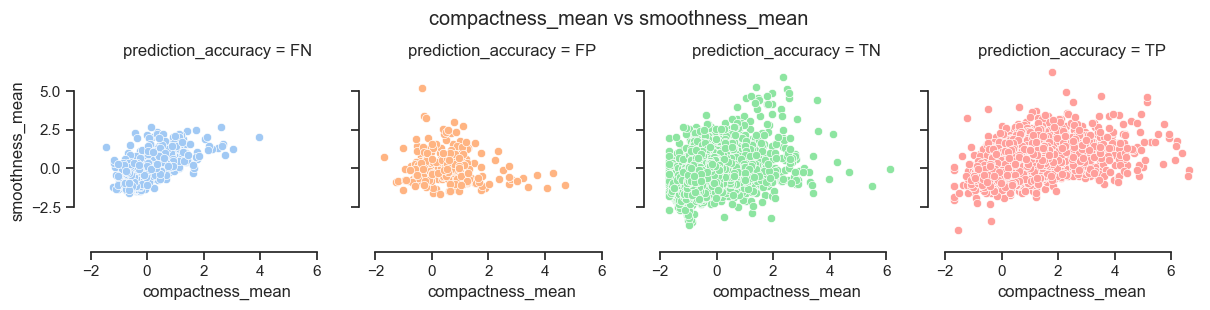

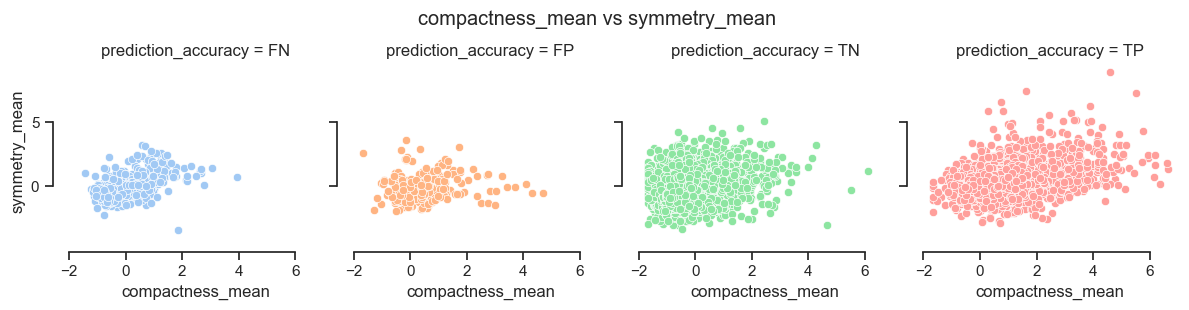

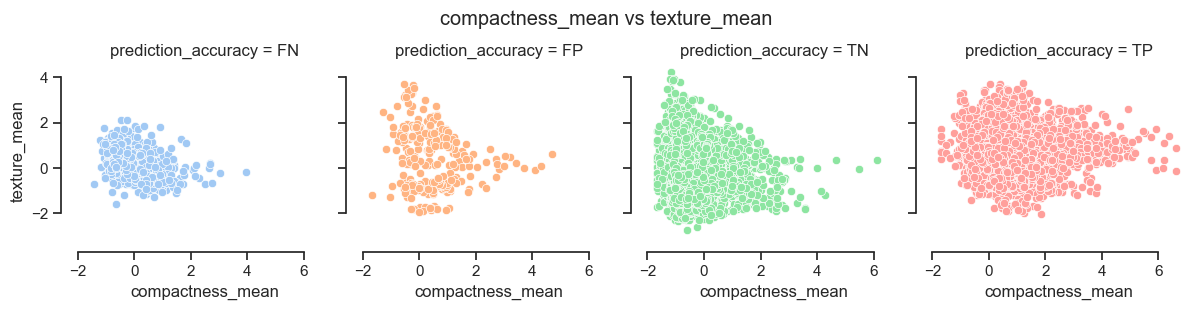

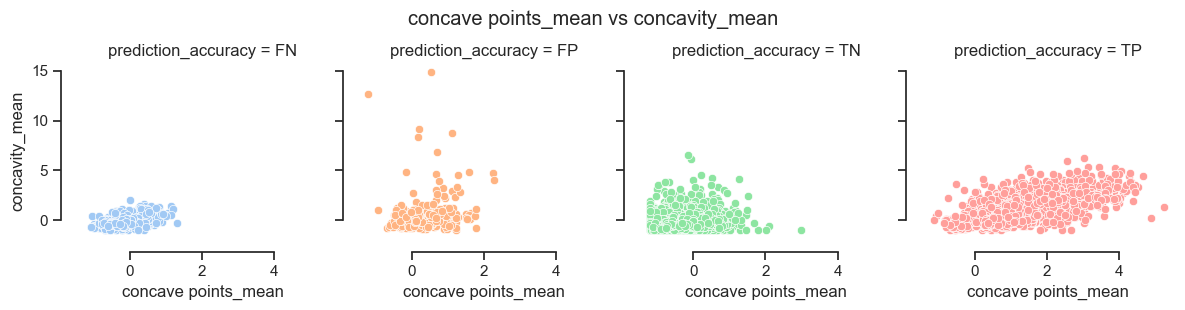

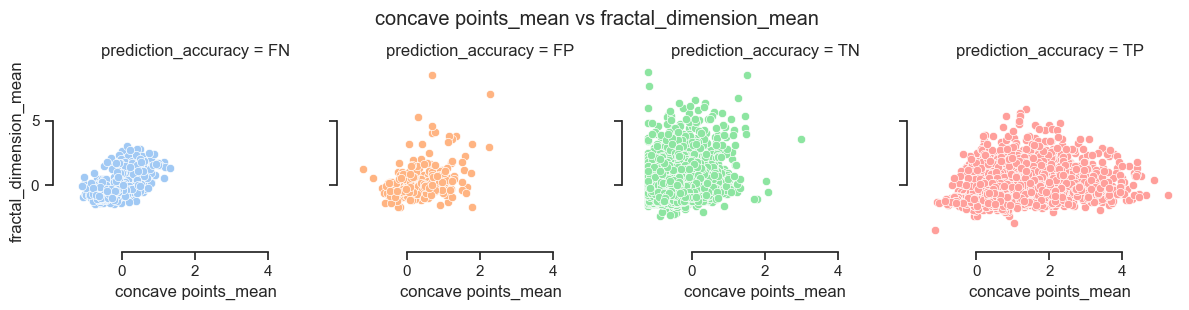

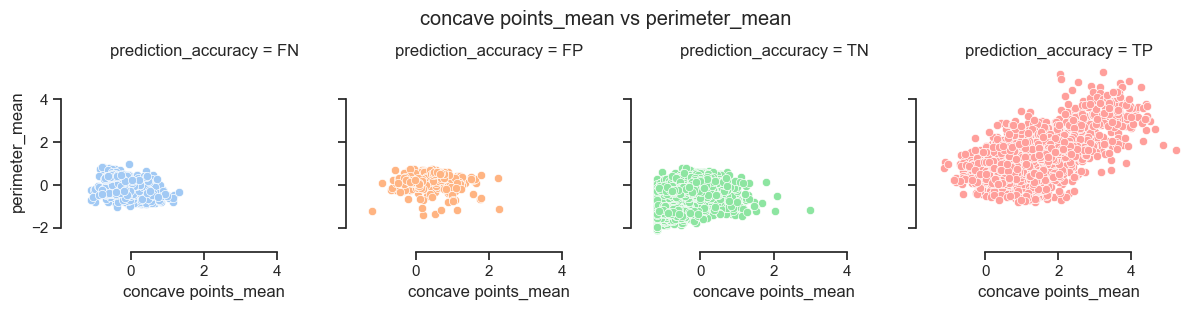

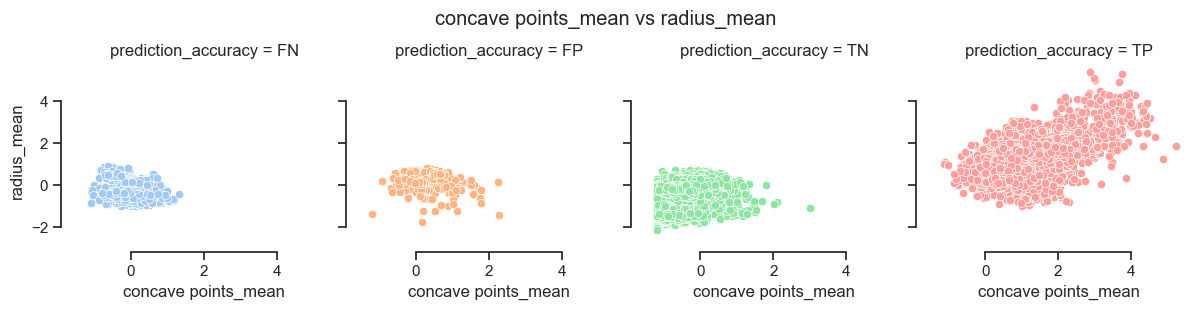

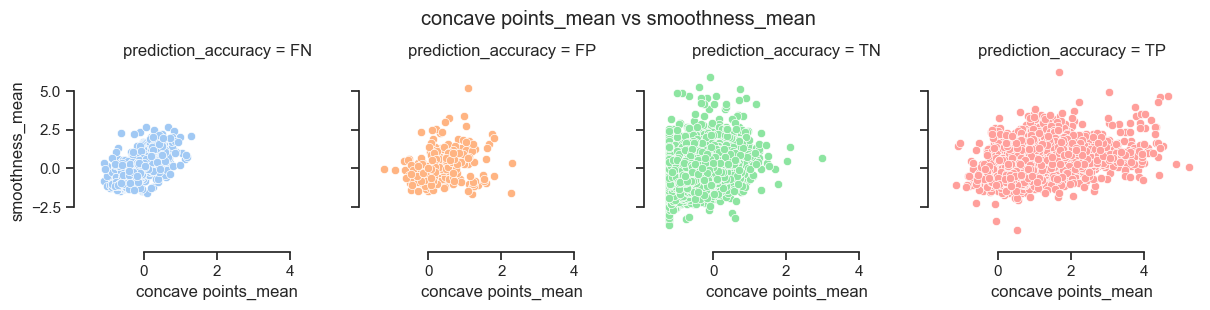

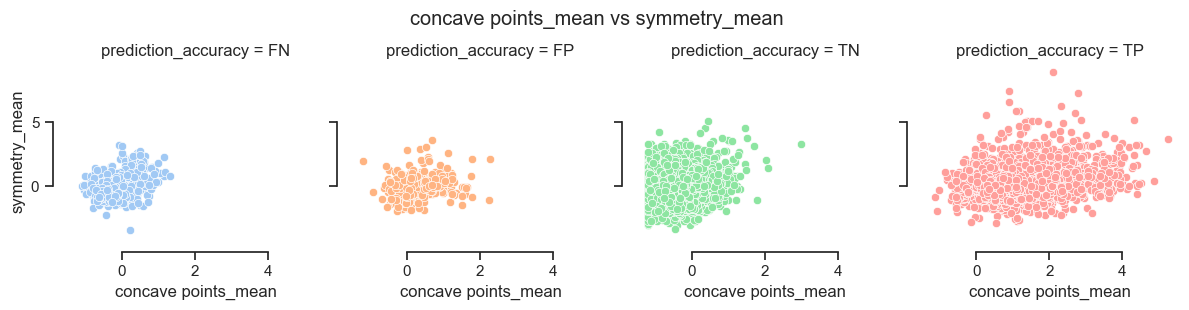

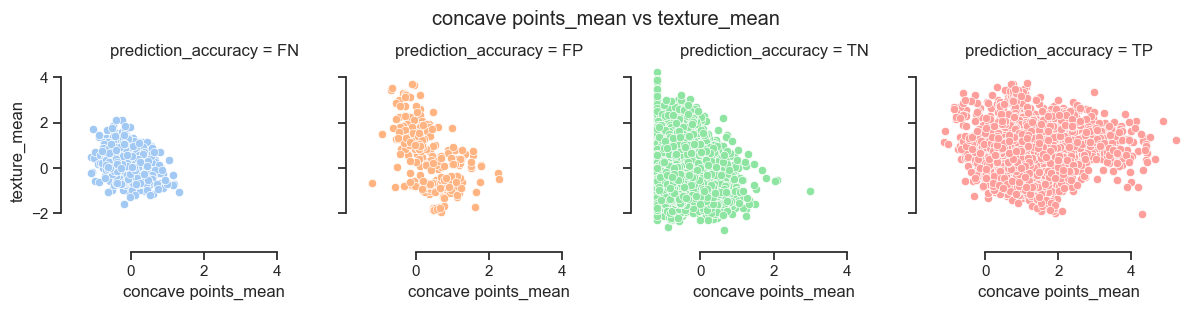

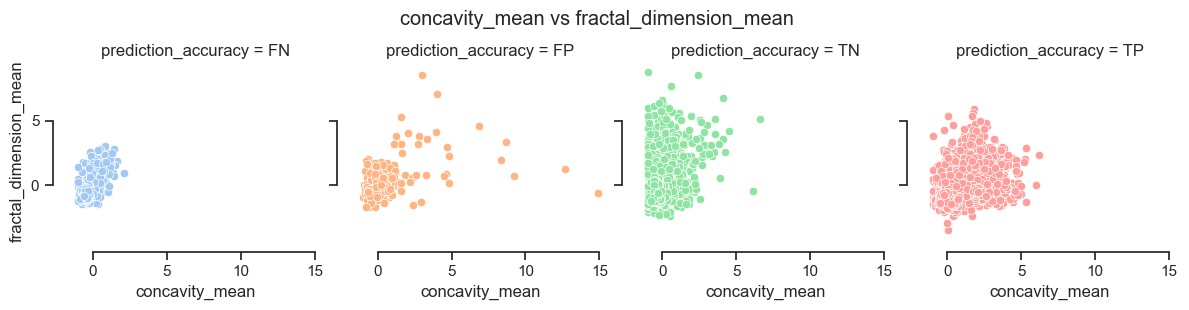

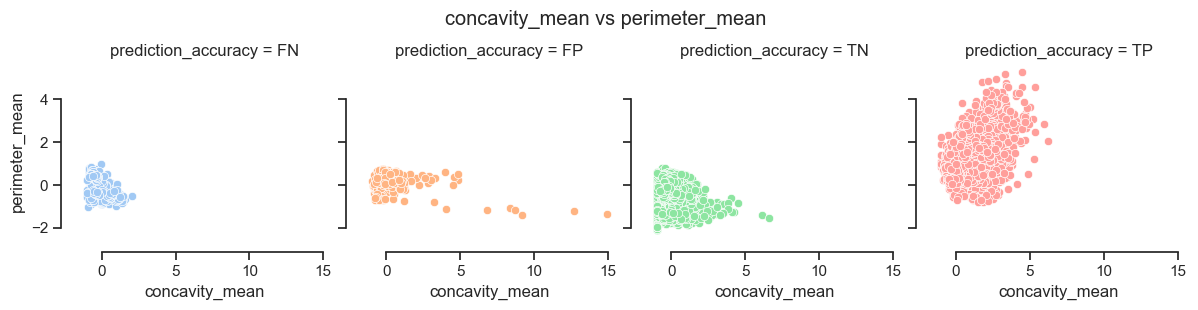

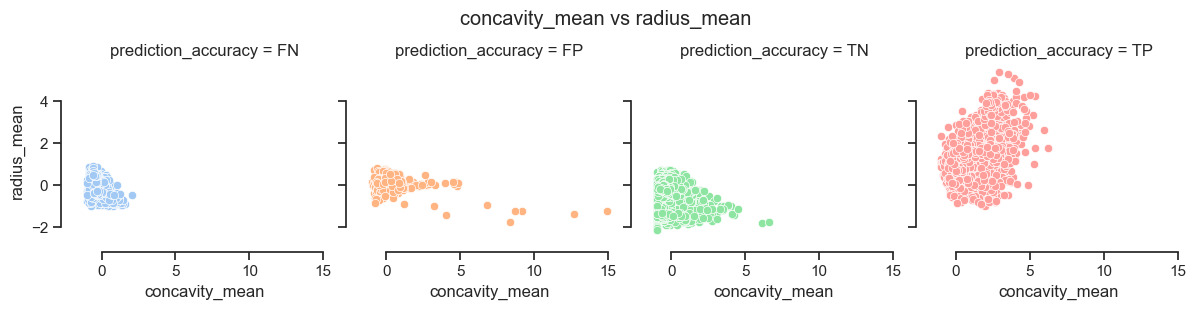

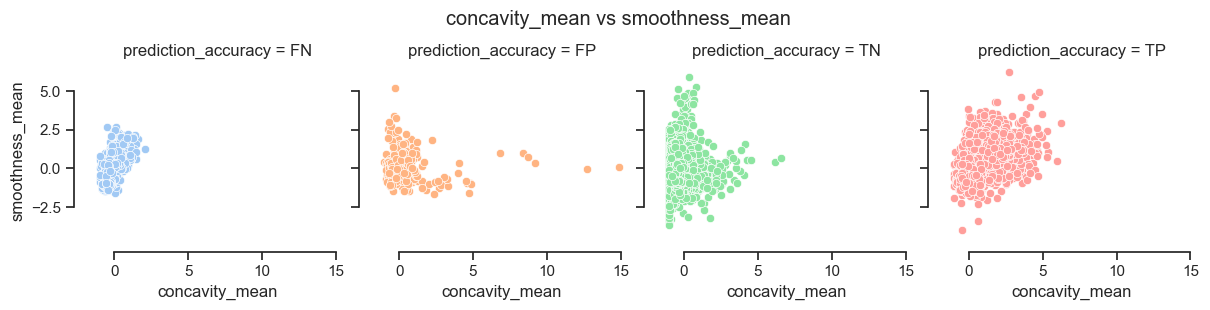

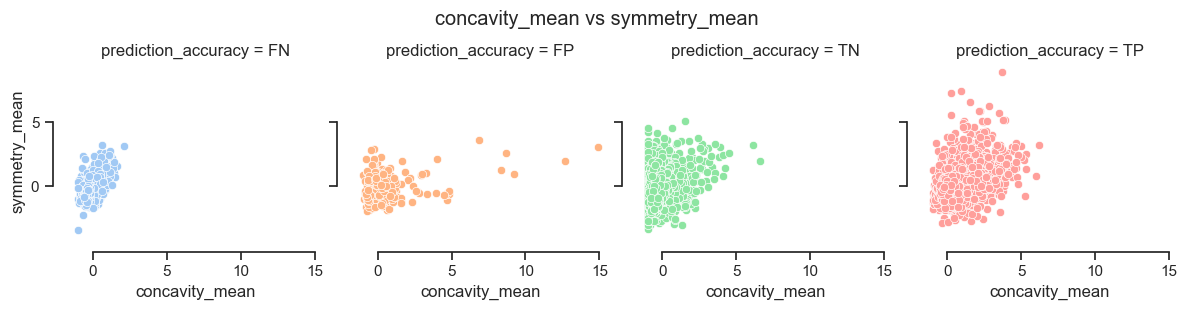

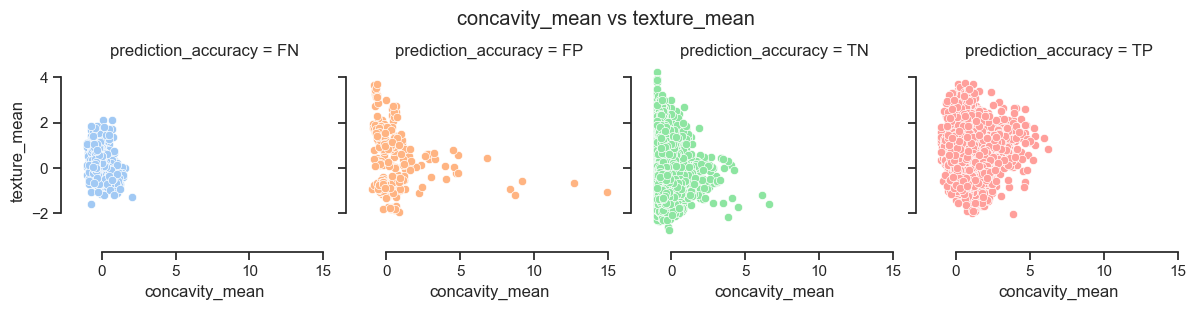

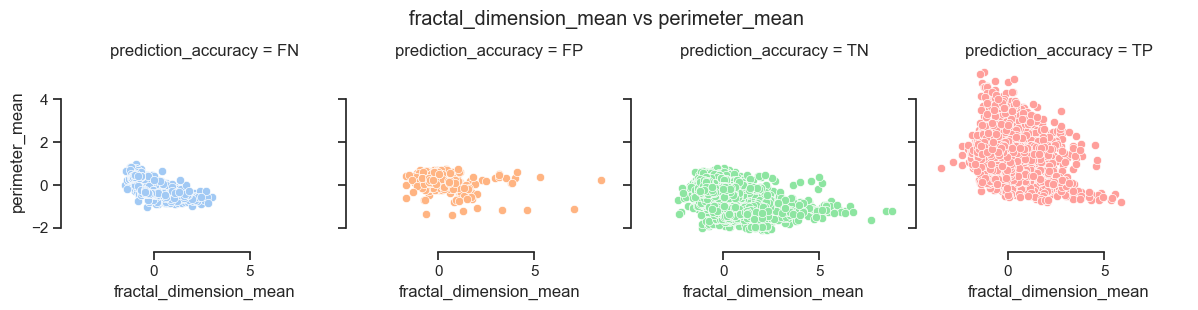

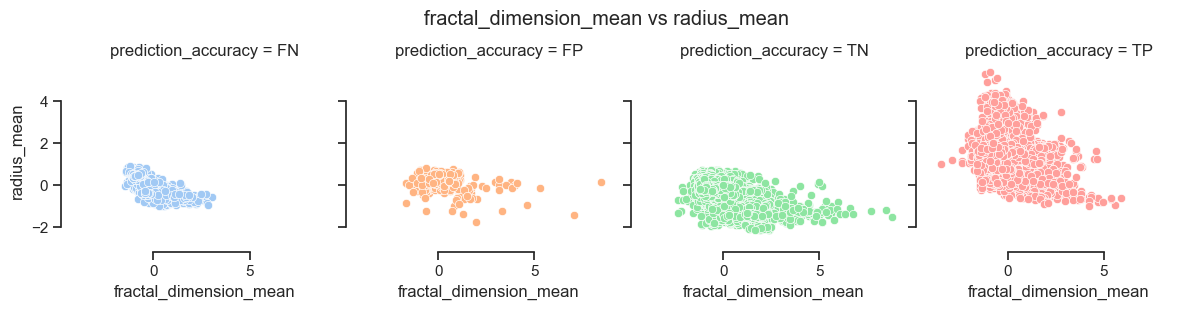

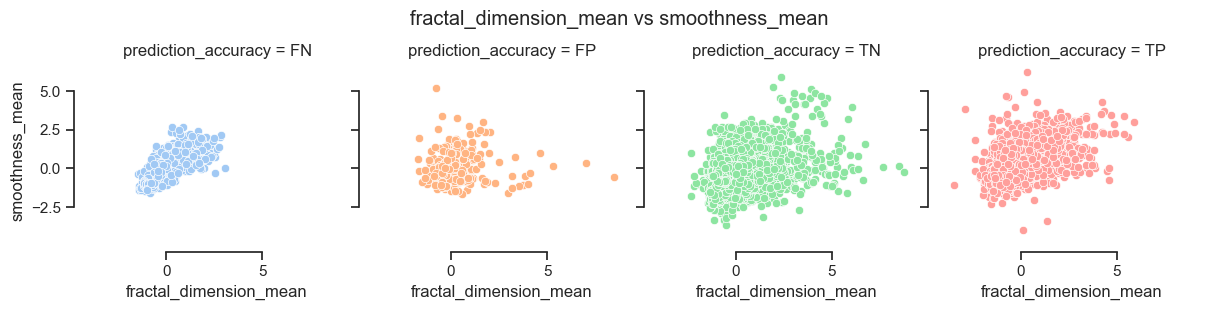

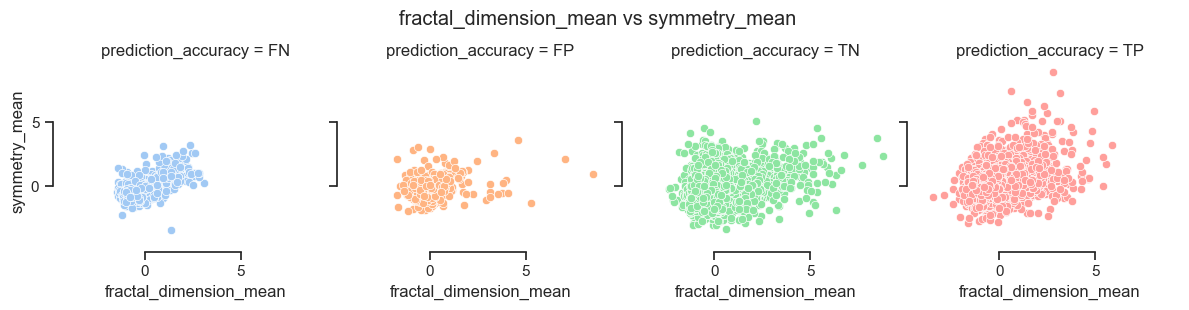

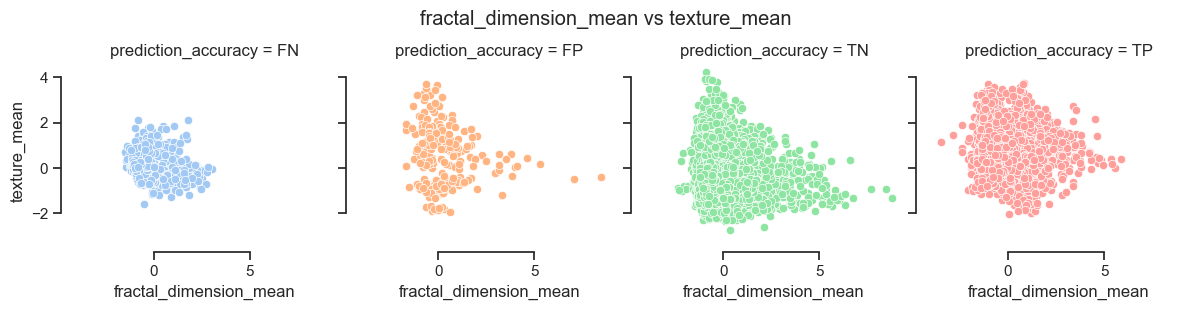

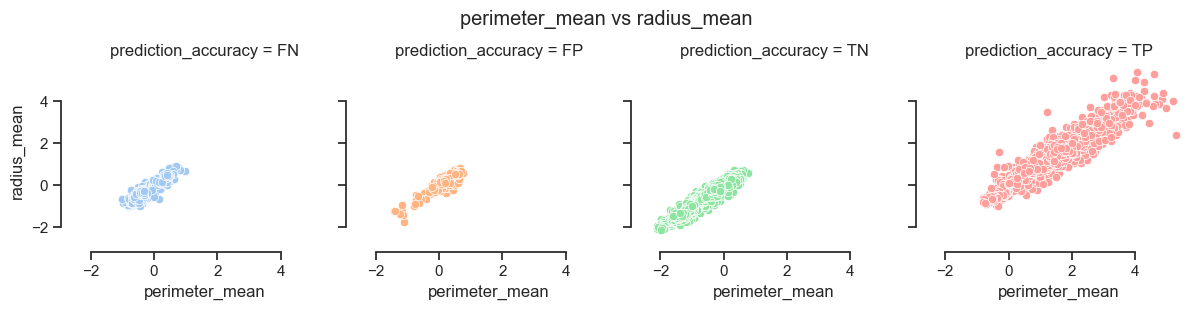

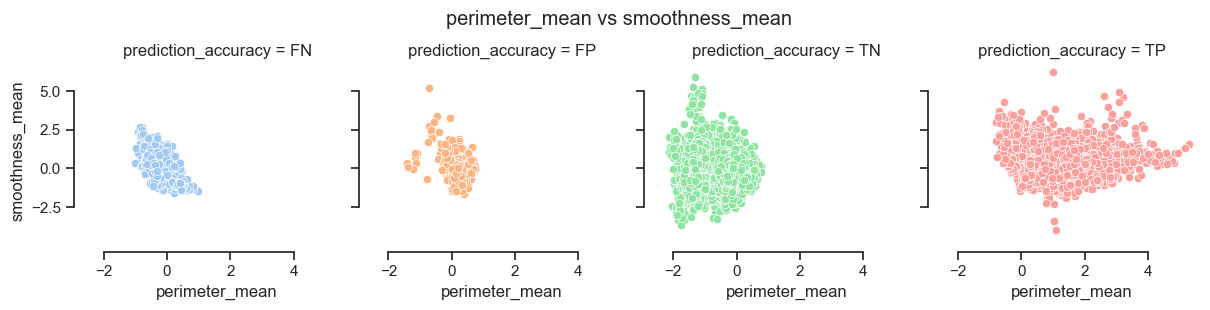

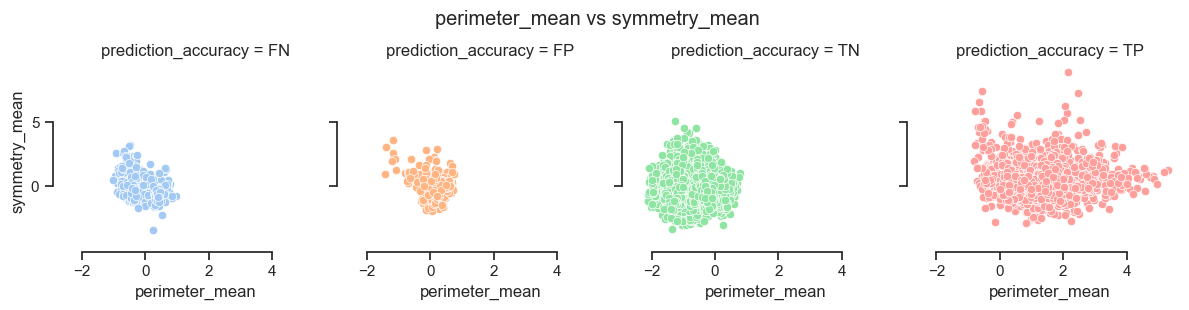

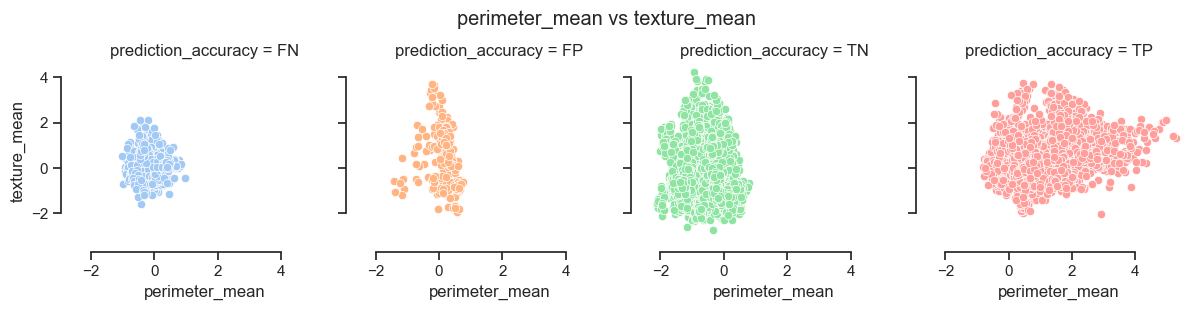

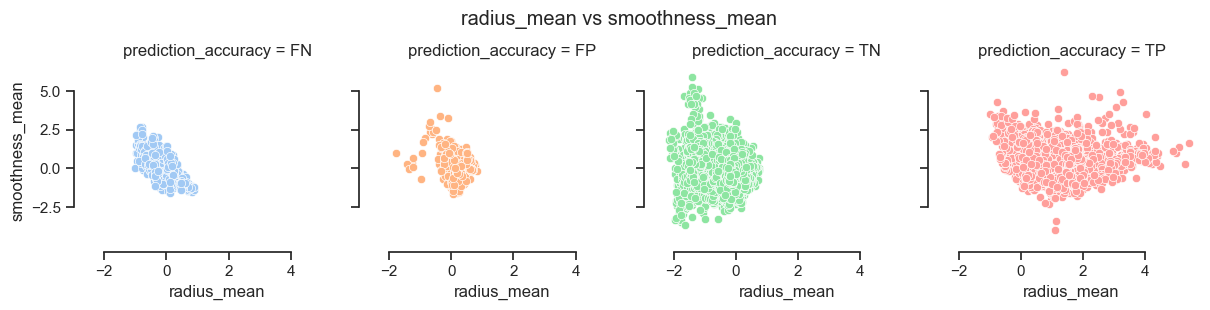

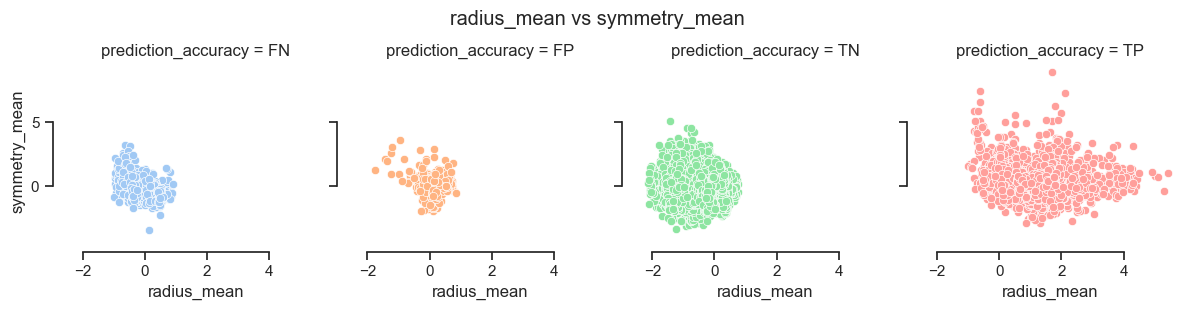

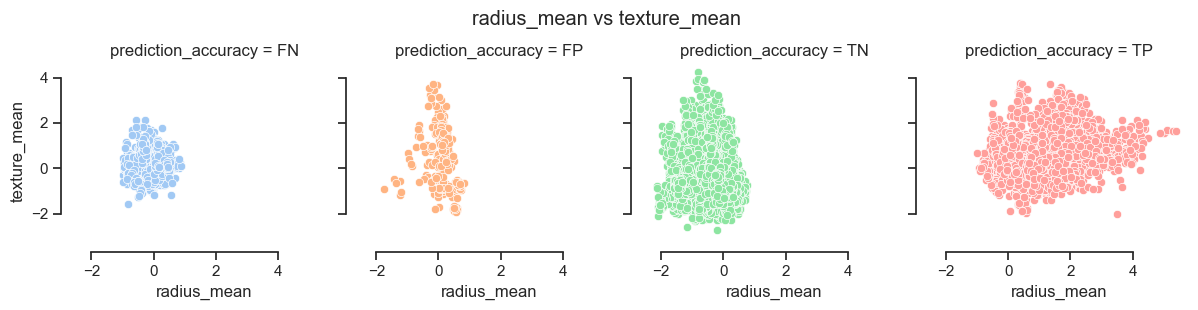

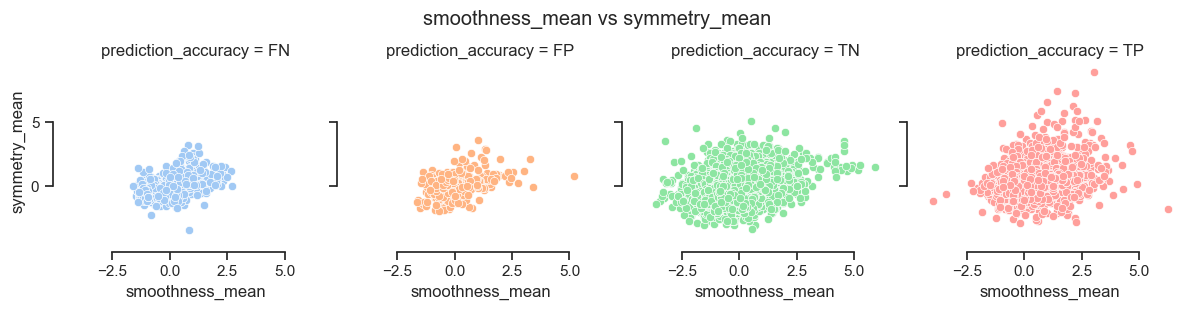

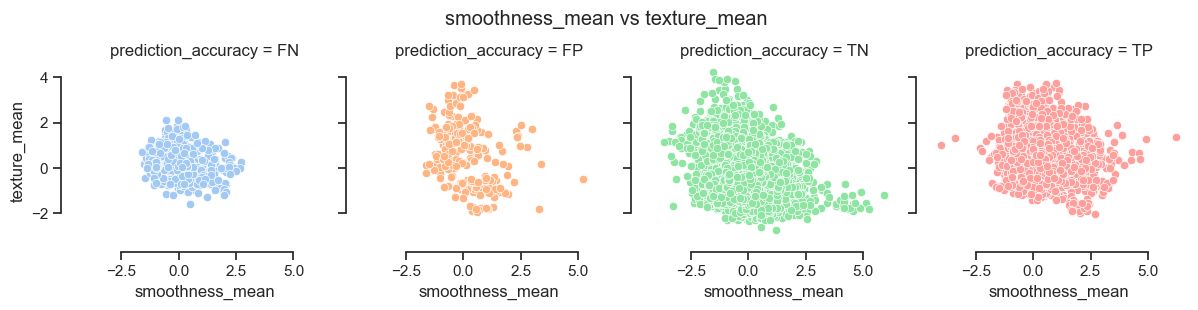

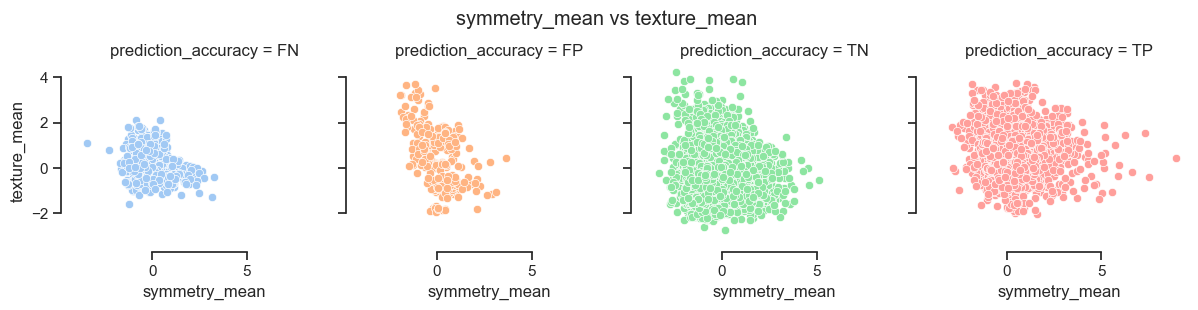

In [14]:
for i in range(len(input_columns)):
    for j in range(i+1, len(input_columns)):
        col1 = input_columns[i]
        col2 = input_columns[j]
        normalized = predictions_wide[['prediction_accuracy', col1, col2]].copy()\
            .sort_values('prediction_accuracy')
        normalized['col1'] = (normalized[col1] - normalized[col1].mean())/normalized[col1].std()
        normalized['col2'] = (normalized[col2] - normalized[col2].mean())/normalized[col2].std()
        g = sns.FacetGrid(normalized, col='prediction_accuracy', hue='prediction_accuracy')
        g.map(sns.scatterplot, "col1", "col2")
        g.fig.subplots_adjust(top=0.8)
        g.fig.suptitle(f"{col1} vs {col2}")
        g.set_xlabels(col1)
        g.set_ylabels(col2)
        sns.despine(offset=10, trim=True)
        plt.show()

 - area vs concavity - TN have more concavity vs area
 - area vs fractal_dimension - TN have more fractal_dimension vs area
 - area vs texture - TN have more texture vs area
 - concavity vs fractal_dimension, perimeter, radius, texture  - TN have more concavity, fractal dimension, texture
 - fractal_dimension vs smoothness, symmetry - TN have more fractal_dimension
 - symmetry vs radius, perimeter - TN have more symmetry
 - area, perimeter, and radius all super correlated

## Creating new features

In [15]:
predictions_wide['area_mean_squared'] = predictions_wide.area_mean**2
predictions_wide['perimeter_mean_squared'] = predictions_wide.perimeter_mean**2
predictions_wide['radius_mean_squared'] = predictions_wide.radius_mean**2

predictions_wide['concavity_over_area'] = predictions_wide.concavity_mean/predictions_wide.area_mean
predictions_wide['fractal_dimension_over_area'] = predictions_wide.fractal_dimension_mean/predictions_wide.area_mean
predictions_wide['texture_over_area'] = predictions_wide.texture_mean/predictions_wide.area_mean

predictions_wide['concavity_over_fractal_dimension'] = predictions_wide.concavity_mean/predictions_wide.fractal_dimension_mean
predictions_wide['concavity_over_perimeter'] = predictions_wide.concavity_mean/predictions_wide.perimeter_mean
predictions_wide['concavity_over_radius'] = predictions_wide.concavity_mean/predictions_wide.radius_mean
predictions_wide['concavity_over_texture'] = predictions_wide.concavity_mean/predictions_wide.texture_mean

predictions_wide['smoothness_over_fractal_dimension'] = predictions_wide.smoothness_mean/predictions_wide.fractal_dimension_mean
predictions_wide['symmetry_over_fractal_dimension'] = predictions_wide.symmetry_mean/predictions_wide.fractal_dimension_mean

predictions_wide['perimeter_over_symmetry'] = predictions_wide.perimeter_mean/predictions_wide.symmetry_mean
predictions_wide['radius_over_symmetry'] = predictions_wide.radius_mean/predictions_wide.symmetry_mean

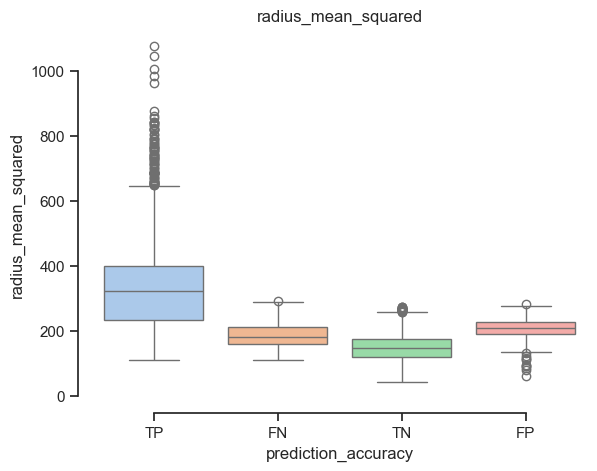

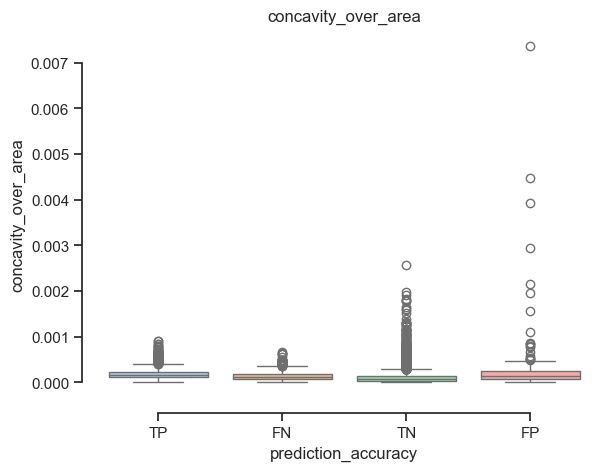

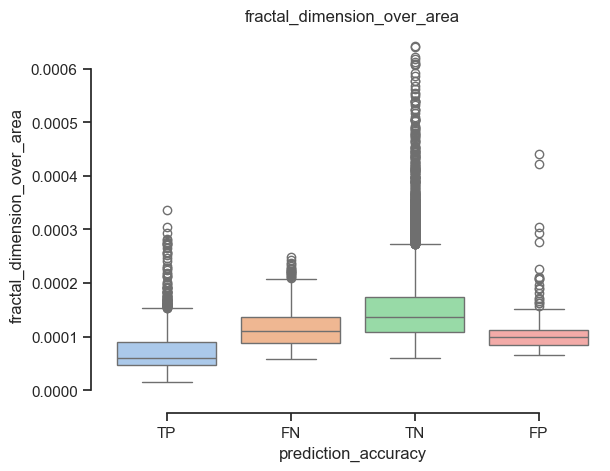

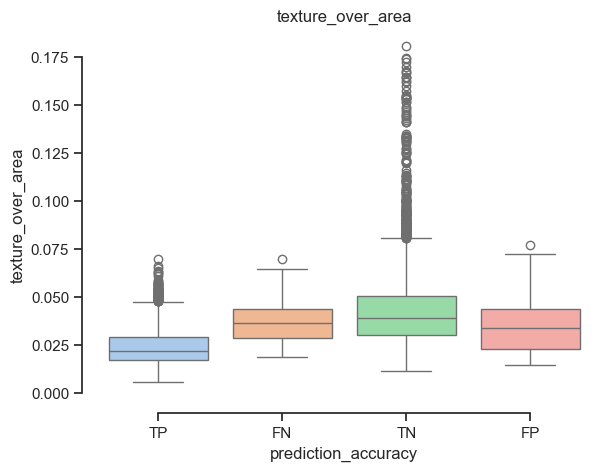

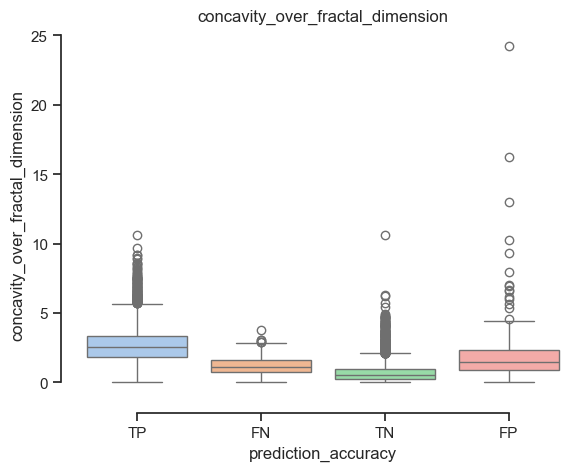

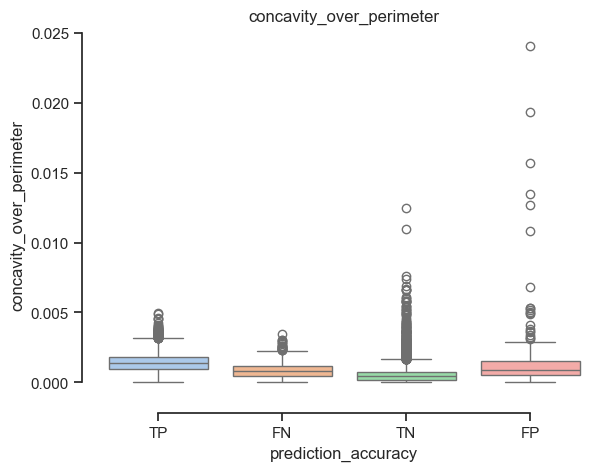

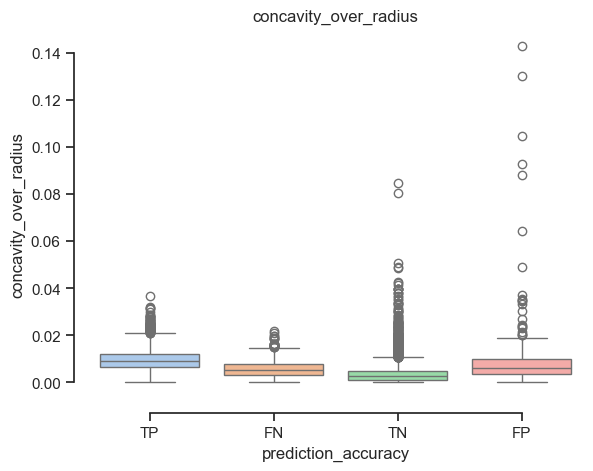

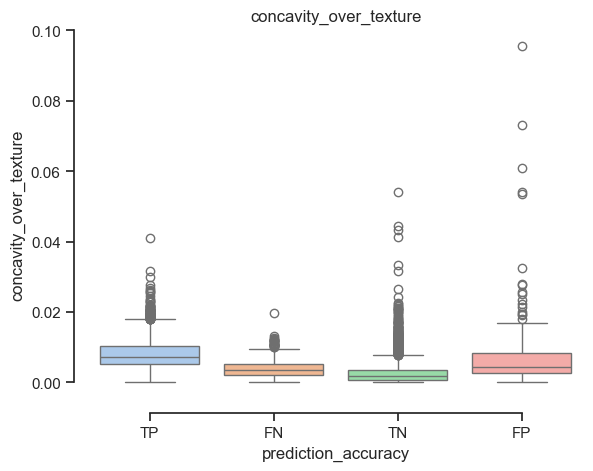

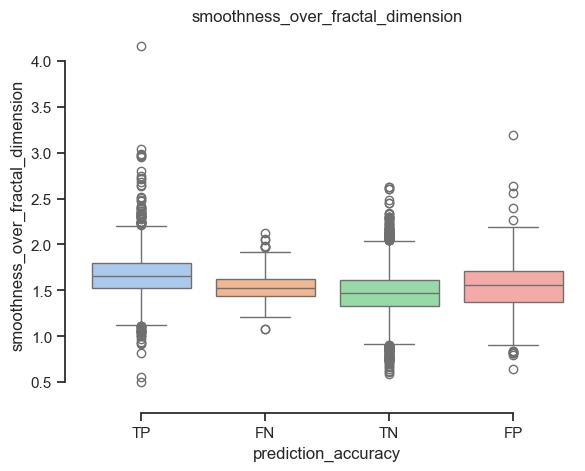

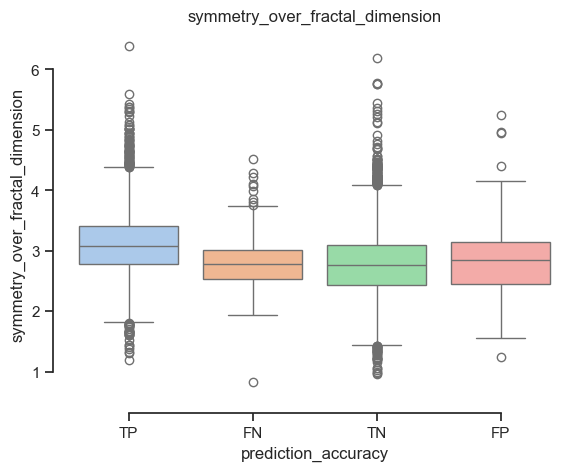

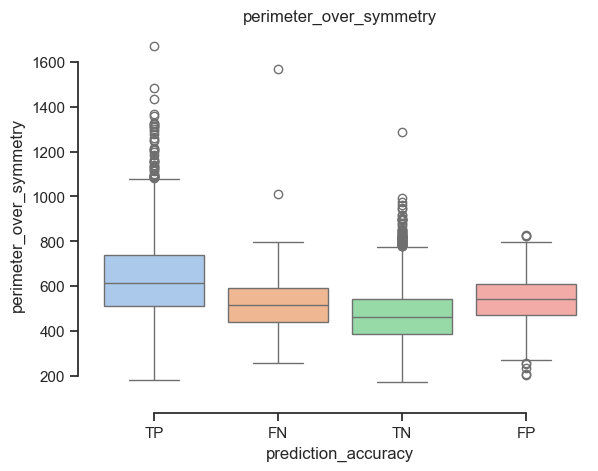

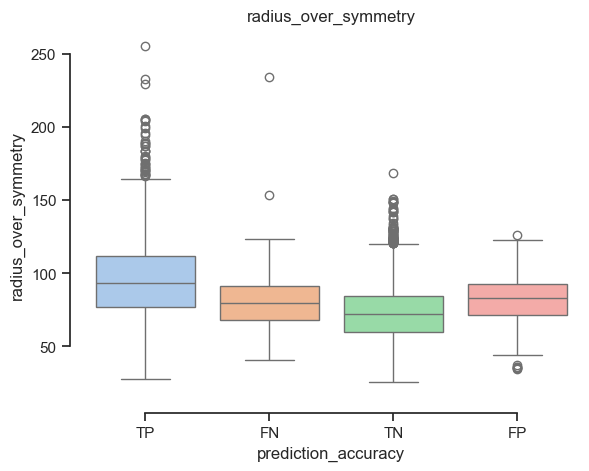

In [16]:
for new_col in predictions_wide.columns.tolist()[-12:]:
    sns.boxplot(x='prediction_accuracy', y=new_col,
                hue='prediction_accuracy', data=predictions_wide)
    sns.despine(offset=10, trim=True)
    plt.title(new_col)
    plt.show()

# Creating and testing the new model

In [17]:
new_model_cols = predictions_wide.columns.tolist()[5:]
new_X_train_scaled = scaler.fit_transform(predictions_wide[new_model_cols])
new_model = SVC(random_state=55, probability=True, C=0.01, degree=1, max_iter=-1, gamma=1, kernel='linear')
new_model.fit(new_X_train_scaled, y_train)

new_predictions = new_model.predict(new_X_train_scaled)
new_prediction_probs = new_model.predict_proba(new_X_train_scaled)

print(f'Accuracy: {accuracy_score(y_train, new_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(new_model, new_X_train_scaled, y_train, cv=5))}')

Accuracy: 0.9312215610780539
Avg CV accuracy: 0.9241349590600956


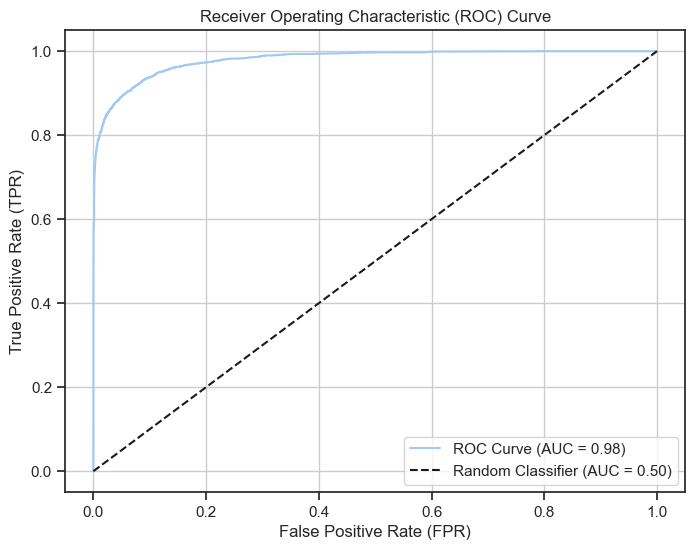

In [18]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
new_prediction_probs_binary = [x[1] for x in new_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, new_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, new_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

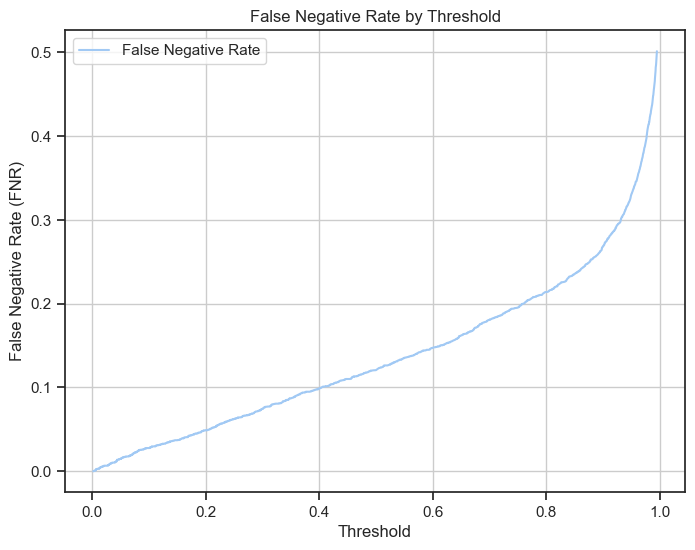

In [19]:
fpr, fnr, thresholds = det_curve(y_train_binary, new_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
new_prediction_df = pd.DataFrame({'diagnosis': y_train, 
                              'prediction' : new_predictions,
                              'M_probability': [x[1] for x in new_prediction_probs],
                              'prediction_probability': [np.max([x[0], x[1]]) for x in new_prediction_probs]})

new_prediction_df['prediction_accuracy'] = 'TP'
new_prediction_df.loc[(new_prediction_df.diagnosis == 'B') & 
                      (new_prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'TN'
new_prediction_df.loc[(new_prediction_df.diagnosis == 'B') & 
                      (new_prediction_df.prediction == 'M'), 'prediction_accuracy'] = 'FP'
new_prediction_df.loc[(new_prediction_df.diagnosis == 'M') & 
                      (new_prediction_df.prediction == 'B'), 'prediction_accuracy'] = 'FN'

new_predictions_wide = new_prediction_df.merge(predictions_wide[new_model_cols], 
                                               left_index=True, right_index=True, how='inner')

## Graphing feature importance

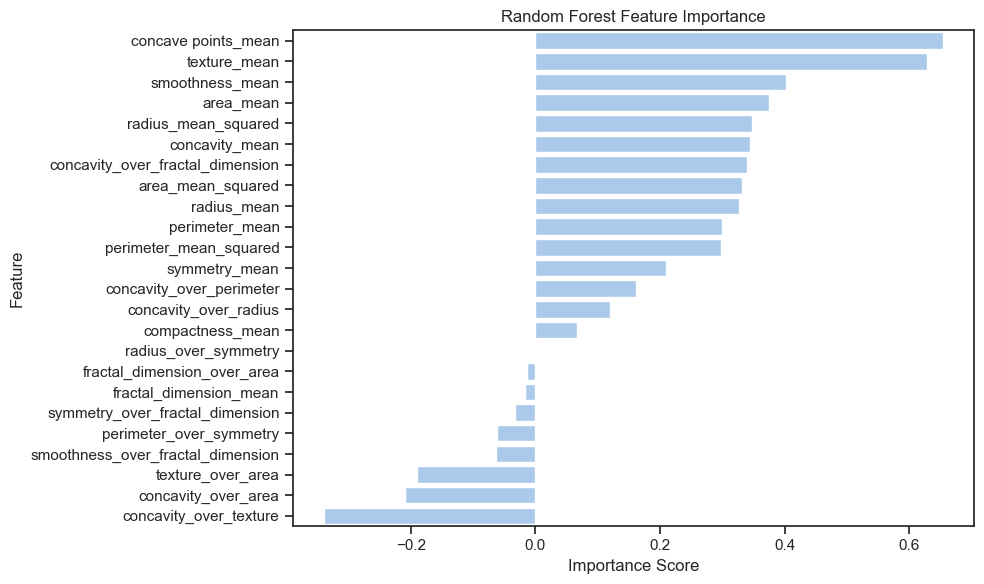

In [21]:
new_importances = new_model.coef_
new_feature_importance_df = pd.DataFrame({'feature': new_model_cols, 'importance': new_importances[0]})\
    .sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=new_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Iterating over the model until we get best results

In [22]:
iterate_model_cols = new_feature_importance_df[
    (abs(new_feature_importance_df.importance) > 0.01) & 
#     ~(new_feature_importance_df.feature.str.contains('perimeter_')) & 
#     ~(new_feature_importance_df.feature.str.contains('radius_')) &
    ~(new_feature_importance_df.feature.isna())
].feature

iterate_X_train_scaled = scaler.fit_transform(predictions_wide[iterate_model_cols])

iterate_model = SVC(random_state=55, probability=True, C=0.01, degree=1, max_iter=-1, gamma=1, kernel='linear')
iterate_model.fit(iterate_X_train_scaled, y_train)

iterate_predictions = iterate_model.predict(iterate_X_train_scaled)
iterate_prediction_probs = iterate_model.predict_proba(iterate_X_train_scaled)

print(f'Accuracy: {accuracy_score(y_train, iterate_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(iterate_model, iterate_X_train_scaled, y_train, cv=5))}')

Accuracy: 0.9312215610780539
Avg CV accuracy: 0.9241349207716649


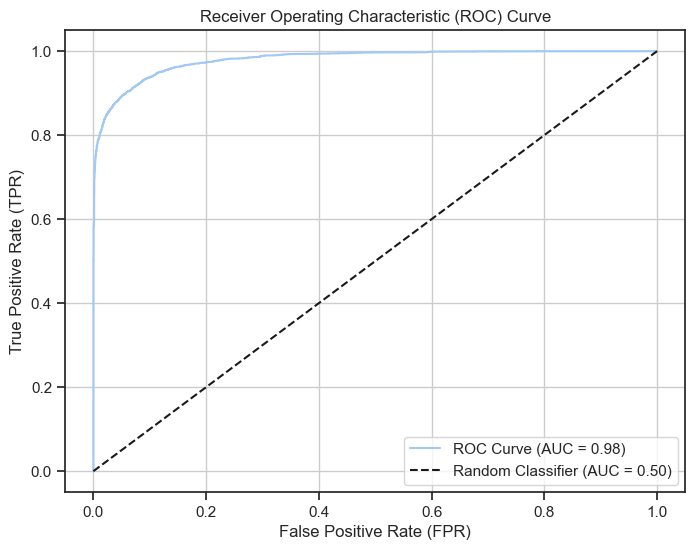

In [23]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
iterate_prediction_probs_binary = [x[1] for x in iterate_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, iterate_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, iterate_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

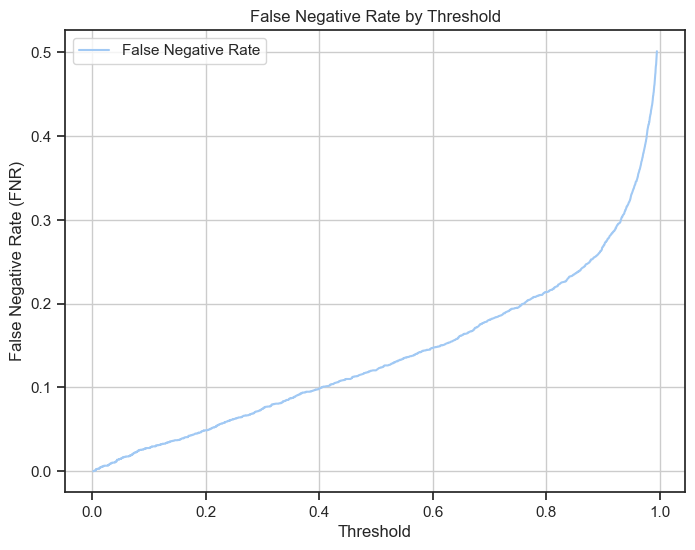

In [24]:
fpr, fnr, thresholds = det_curve(y_train_binary, iterate_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

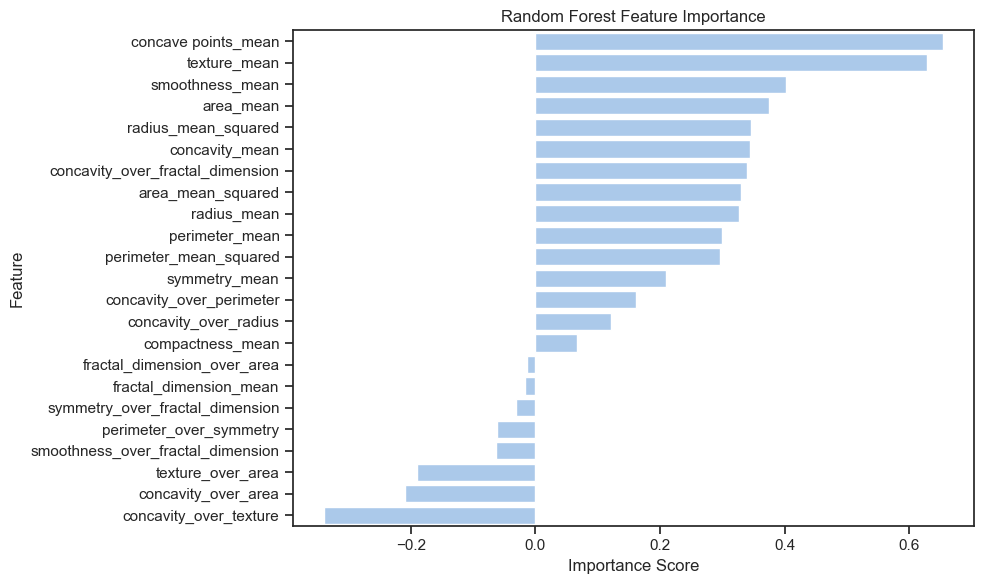

In [25]:
iterate_importances = iterate_model.coef_
iterate_feature_importance_df = pd.DataFrame({'feature': iterate_model_cols, 'importance': iterate_importances[0]})\
    .sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=iterate_feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Settling on the final model and testing

In [26]:
final_model_cols = new_feature_importance_df.feature

X_test['area_mean_squared'] = X_test.area_mean**2
X_test['perimeter_mean_squared'] = X_test.perimeter_mean**2
X_test['radius_mean_squared'] = X_test.radius_mean**2

X_test['concavity_over_area'] = X_test.concavity_mean/X_test.area_mean
X_test['fractal_dimension_over_area'] = X_test.fractal_dimension_mean/X_test.area_mean
X_test['texture_over_area'] = X_test.texture_mean/X_test.area_mean

X_test['concavity_over_fractal_dimension'] = X_test.concavity_mean/X_test.fractal_dimension_mean
X_test['concavity_over_perimeter'] = X_test.concavity_mean/X_test.perimeter_mean
X_test['concavity_over_radius'] = X_test.concavity_mean/X_test.radius_mean
X_test['concavity_over_texture'] = X_test.concavity_mean/X_test.texture_mean

X_test['smoothness_over_fractal_dimension'] = X_test.smoothness_mean/X_test.fractal_dimension_mean
X_test['symmetry_over_fractal_dimension'] = X_test.symmetry_mean/X_test.fractal_dimension_mean

X_test['perimeter_over_symmetry'] = X_test.perimeter_mean/X_test.symmetry_mean
X_test['radius_over_symmetry'] = X_test.radius_mean/X_test.symmetry_mean

final_X_train_scaled = scaler.fit_transform(predictions_wide[final_model_cols])
final_X_test_scaled = scaler.fit_transform(X_test[final_model_cols])

final_model = SVC(random_state=55, probability=True, C=0.01, degree=1, max_iter=-1, gamma=1, kernel='linear')
final_model.fit(final_X_train_scaled, y_train)

final_predictions = final_model.predict(final_X_train_scaled)
final_prediction_probs = final_model.predict_proba(final_X_train_scaled)

print(f'Accuracy: {accuracy_score(y_train, final_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(final_model, final_X_train_scaled, y_train, cv=5))}')

Accuracy: 0.9312215610780539
Avg CV accuracy: 0.9241349590600956


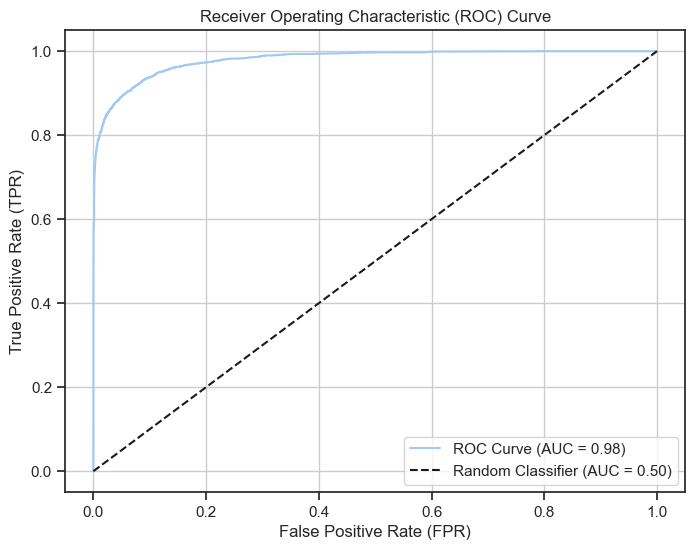

In [27]:
y_train_binary = [int(entry) for entry in np.where(y_train == 'M', 1, 0)]
final_prediction_probs_binary = [x[1] for x in final_prediction_probs]

fpr, tpr, thresholds = roc_curve(y_train_binary, final_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(y_train_binary, final_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

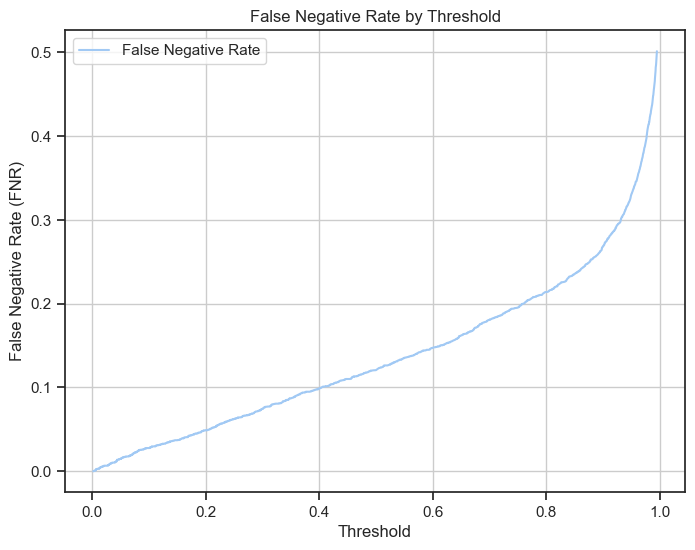

In [28]:
fpr, fnr, thresholds = det_curve(y_train_binary, final_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

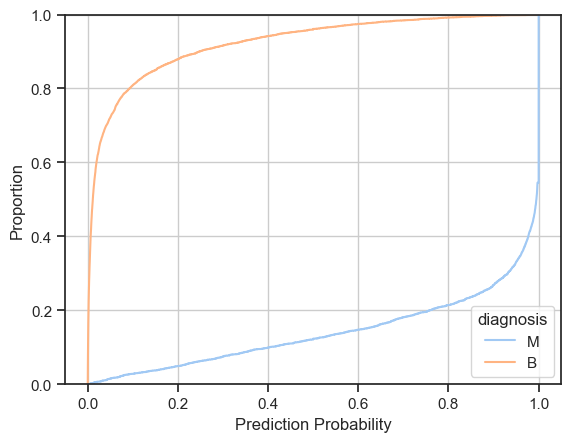

In [29]:
final_prediction_df = pd.DataFrame({'diagnosis': y_train, 
                                    'prediction' : final_predictions,
                                    'M_probability': [x[1] for x in final_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in final_prediction_probs]})

sns.ecdfplot(data=final_prediction_df,
             x='M_probability', hue='diagnosis')
plt.xlabel('Prediction Probability')
plt.grid(True)
plt.show()

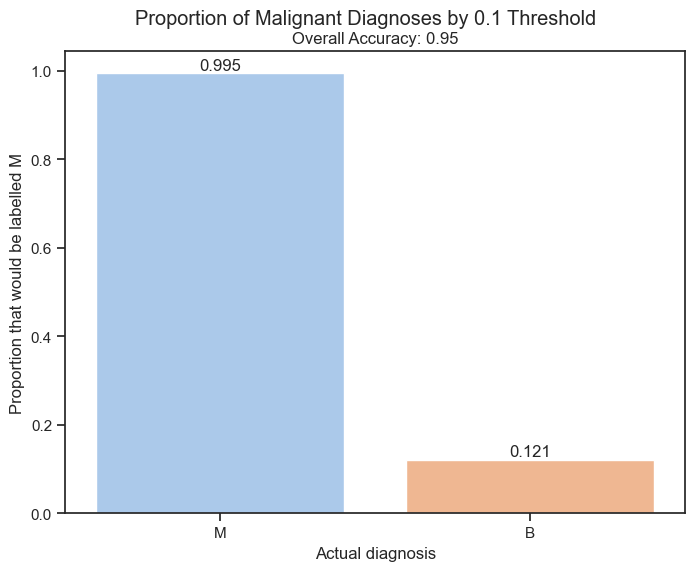

In [51]:
final_test_predictions = final_model.predict(final_X_test_scaled)
final_test_prediction_probs = final_model.predict_proba(final_X_test_scaled)

final_test_prediction_df = pd.DataFrame({'diagnosis': y_test, 
                                    'prediction' : final_test_predictions,
                                    'M_probability': [x[1] for x in final_test_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in final_test_prediction_probs],
                                    'is_above_10_percent': [x[1] > 0.1 for x in final_test_prediction_probs]})

fig, ax = plt.subplots(figsize=(8, 6))
bars = sns.barplot(data=final_test_prediction_df, x='diagnosis', 
                   y='is_above_10_percent', hue='diagnosis', ax=ax, errorbar=None)
ax.bar_label(bars.containers[0], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
ax.bar_label(bars.containers[1], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
plt.xlabel('Actual diagnosis')
plt.ylabel('Proportion that would be labelled M')
plt.suptitle('Proportion of Malignant Diagnoses by 0.1 Threshold', y=0.95)
plt.title(f'Overall Accuracy: \
{round(accuracy_score(y_test, final_test_predictions, normalize=True, sample_weight=None), 2)}')
plt.show()

# Recreating these results with the original dataset

In [31]:
cancer_dataset = pd.read_csv('Breast_cancer_dataset.csv')\
    .drop('Unnamed: 32', axis=1)
cancer_dataset

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0       842302         M       17.990         10.38          122.80   
1       842517         M       20.570         17.77          132.90   
2     84300903         M       19.690         21.25          130.00   
3     84348301         M       11.420         20.38           77.58   
4     84358402         M       20.290         14.34          135.10   
5       843786         M       12.450         15.70           82.57   
6       844359         M       18.250         19.98          119.60   
7     84458202         M       13.710         20.83           90.20   
8       844981         M       13.000         21.82           87.50   
9     84501001         M       12.460         24.04           83.97   
10      845636         M       16.020         23.24          102.70   
11    84610002         M       15.780         17.89          103.60   
12      846226         M       19.170         24.80          132.40   
13      846381         M       15.850         23.95          103.70   
14    84667401         M       13.730         22.61           93.60   
15    84799002         M       14.540         27.54           96.73   
16      848406         M       14.680         20.13           94.74   
17    84862001         M       16.130         20.68          108.10   
18      849014         M       19.810         22.15          130.00   
19     8510426         B       13.540         14.36           87.46   
20     8510653         B       13.080         15.71           85.63   
21     8510824         B        9.504         12.44           60.34   
22     8511133         M       15.340         14.26          102.50   
23      851509         M       21.160         23.04          137.20   
24      852552         M       16.650         21.38          110.00   
25      852631         M       17.140         16.40          116.00   
26      852763         M       14.580         21.53           97.41   
27      852781         M       18.610         20.25          122.10   
28      852973         M       15.300         25.27          102.40   
29      853201         M       17.570         15.05          115.00   
30      853401         M       18.630         25.11          124.80   
31      853612         M       11.840         18.70           77.93   
32    85382601         M       17.020         23.98          112.80   
33      854002         M       19.270         26.47          127.90   
34      854039         M       16.130         17.88          107.00   
35      854253         M       16.740         21.59          110.10   
36      854268         M       14.250         21.72           93.63   
37      854941         B       13.030         18.42           82.61   
38      855133         M       14.990         25.20           95.54   
39      855138         M       13.480         20.82           88.40   
40      855167         M       13.440         21.58           86.18   
41      855563         M       10.950         21.35           71.90   
42      855625         M       19.070         24.81          128.30   
43      856106         M       13.280         20.28           87.32   
44    85638502         M       13.170         21.81           85.42   
45      857010         M       18.650         17.60          123.70   
46    85713702         B        8.196         16.84           51.71   
47       85715         M       13.170         18.66           85.98   
48      857155         B       12.050         14.63           78.04   
49      857156         B       13.490         22.30           86.91   
50      857343         B       11.760         21.60           74.72   
51      857373         B       13.640         16.34           87.21   
52      857374         B       11.940         18.24           75.71   
53      857392         M       18.220         18.70          120.30   
54      857438         M       15.100         22.02           97.26   
55    85759902         B       11.52

In [39]:
cancer_dataset['area_mean_squared'] = cancer_dataset.area_mean**2
cancer_dataset['perimeter_mean_squared'] = cancer_dataset.perimeter_mean**2
cancer_dataset['radius_mean_squared'] = cancer_dataset.radius_mean**2

cancer_dataset['concavity_over_area'] = cancer_dataset.concavity_mean/cancer_dataset.area_mean
cancer_dataset['fractal_dimension_over_area'] = cancer_dataset.fractal_dimension_mean/cancer_dataset.area_mean
cancer_dataset['texture_over_area'] = cancer_dataset.texture_mean/cancer_dataset.area_mean

cancer_dataset['concavity_over_fractal_dimension'] = cancer_dataset.concavity_mean/cancer_dataset.fractal_dimension_mean
cancer_dataset['concavity_over_perimeter'] = cancer_dataset.concavity_mean/cancer_dataset.perimeter_mean
cancer_dataset['concavity_over_radius'] = cancer_dataset.concavity_mean/cancer_dataset.radius_mean
cancer_dataset['concavity_over_texture'] = cancer_dataset.concavity_mean/cancer_dataset.texture_mean

cancer_dataset['smoothness_over_fractal_dimension'] = cancer_dataset.smoothness_mean/cancer_dataset.fractal_dimension_mean
cancer_dataset['symmetry_over_fractal_dimension'] = cancer_dataset.symmetry_mean/cancer_dataset.fractal_dimension_mean

cancer_dataset['perimeter_over_symmetry'] = cancer_dataset.perimeter_mean/cancer_dataset.symmetry_mean
cancer_dataset['radius_over_symmetry'] = cancer_dataset.radius_mean/cancer_dataset.symmetry_mean

cancer_dataset['area_worst_squared'] = cancer_dataset.area_worst**2
cancer_dataset['perimeter_worst_squared'] = cancer_dataset.perimeter_worst**2
cancer_dataset['radius_worst_squared'] = cancer_dataset.radius_worst**2

cancer_dataset['concavity_over_area_worst'] = cancer_dataset.concavity_worst/cancer_dataset.area_worst
cancer_dataset['fractal_dimension_over_area_worst'] = cancer_dataset.fractal_dimension_worst/cancer_dataset.area_worst
cancer_dataset['texture_over_area_worst'] = cancer_dataset.texture_worst/cancer_dataset.area_worst

cancer_dataset['concavity_over_fractal_dimension_worst'] = cancer_dataset.concavity_worst/cancer_dataset.fractal_dimension_worst
cancer_dataset['concavity_over_perimeter_worst'] = cancer_dataset.concavity_worst/cancer_dataset.perimeter_worst
cancer_dataset['concavity_over_radius_worst'] = cancer_dataset.concavity_worst/cancer_dataset.radius_worst
cancer_dataset['concavity_over_texture_worst'] = cancer_dataset.concavity_worst/cancer_dataset.texture_worst

cancer_dataset['smoothness_over_fractal_dimension_worst'] = cancer_dataset.smoothness_worst/cancer_dataset.fractal_dimension_worst
cancer_dataset['symmetry_over_fractal_dimension_worst'] = cancer_dataset.symmetry_worst/cancer_dataset.fractal_dimension_worst

cancer_dataset['perimeter_over_symmetry_worst'] = cancer_dataset.perimeter_worst/cancer_dataset.symmetry_worst
cancer_dataset['radius_over_symmetry_worst'] = cancer_dataset.radius_worst/cancer_dataset.symmetry_worst

expanded_model_cols = [colname for colname in cancer_dataset.columns.tolist()[2:] 
    if colname not in ['texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se']]
original_X_train = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'train'].id.values)][expanded_model_cols]
original_X_test = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'test'].id.values)][expanded_model_cols]
original_y_train = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'train'].id.values)]['diagnosis']
original_y_test = cancer_dataset[cancer_dataset.id.isin(df[df.test_group == 'test'].id.values)]['diagnosis']

original_X_train_scaled = scaler.fit_transform(original_X_train)
original_X_test_scaled = scaler.transform(original_X_test)

In [40]:
expanded_model = SVC(random_state=55, probability=True, C=0.01, degree=1, max_iter=-1, gamma=1, kernel='linear')
expanded_model.fit(original_X_train_scaled, original_y_train)

expanded_predictions = expanded_model.predict(original_X_train_scaled)
expanded_prediction_probs = expanded_model.predict_proba(original_X_train_scaled)

print(f'Accuracy: {accuracy_score(original_y_train, expanded_predictions, normalize=True, sample_weight=None)}')
print(f'Avg CV accuracy: {np.mean(cross_val_score(expanded_model, original_X_train_scaled, original_y_train, cv=5))}')

Accuracy: 0.9802197802197802
Avg CV accuracy: 0.964835164835165


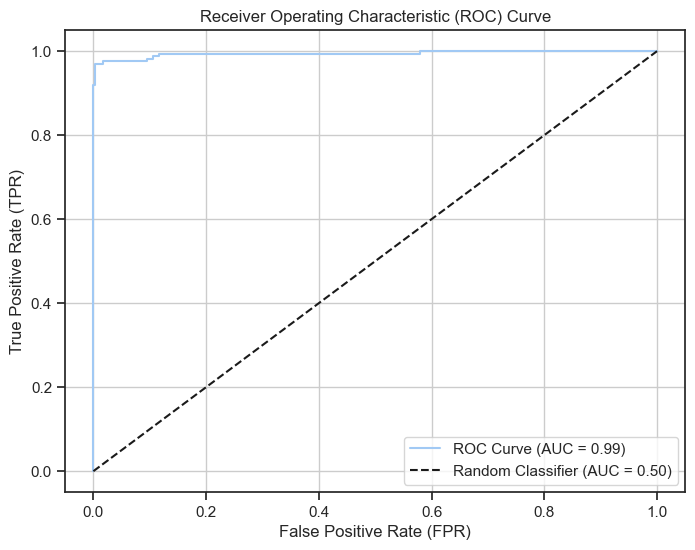

In [41]:
original_y_train_binary = [int(entry) for entry in np.where(original_y_train == 'M', 1, 0)]
expanded_prediction_probs_binary = [x[1] for x in expanded_prediction_probs]

fpr, tpr, thresholds = roc_curve(original_y_train_binary, expanded_prediction_probs_binary)

# 4. Calculate AUC Score
auc_score = roc_auc_score(original_y_train_binary, expanded_prediction_probs_binary)

# 5. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

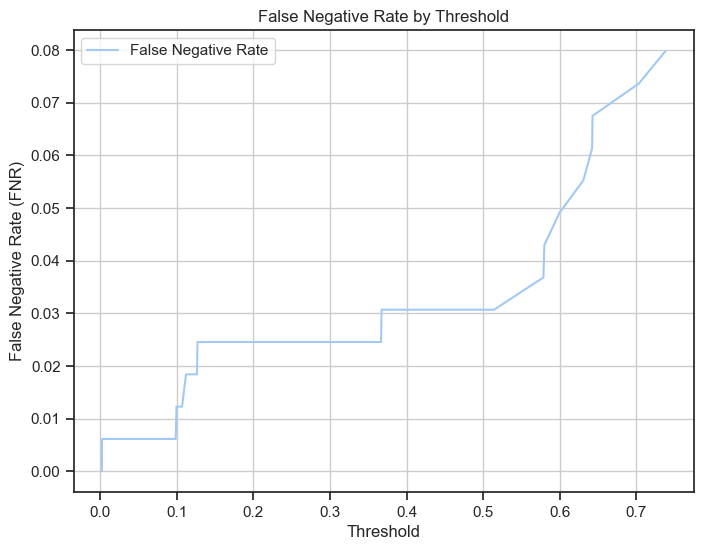

In [42]:
fpr, fnr, thresholds = det_curve(original_y_train_binary, expanded_prediction_probs_binary)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, fnr, label='False Negative Rate')
plt.xlabel('Threshold')
plt.ylabel('False Negative Rate (FNR)')
plt.title('False Negative Rate by Threshold')
plt.grid(True)
plt.legend()
plt.show()

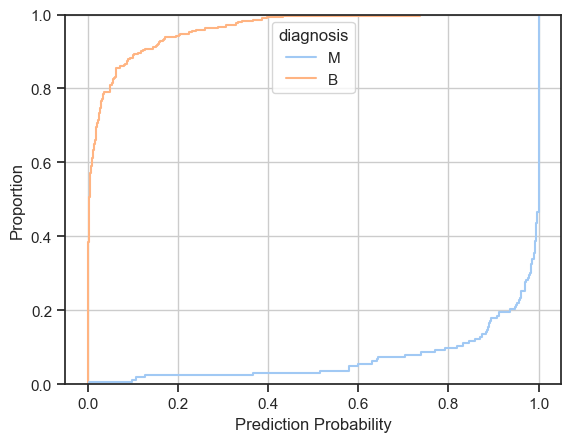

In [43]:
expanded_prediction_df = pd.DataFrame({'diagnosis': original_y_train, 
                                    'prediction' : expanded_predictions,
                                    'M_probability': [x[1] for x in expanded_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in expanded_prediction_probs]})

sns.ecdfplot(data=expanded_prediction_df,
             x='M_probability', hue='diagnosis')
plt.xlabel('Prediction Probability')
plt.grid(True)
plt.show()

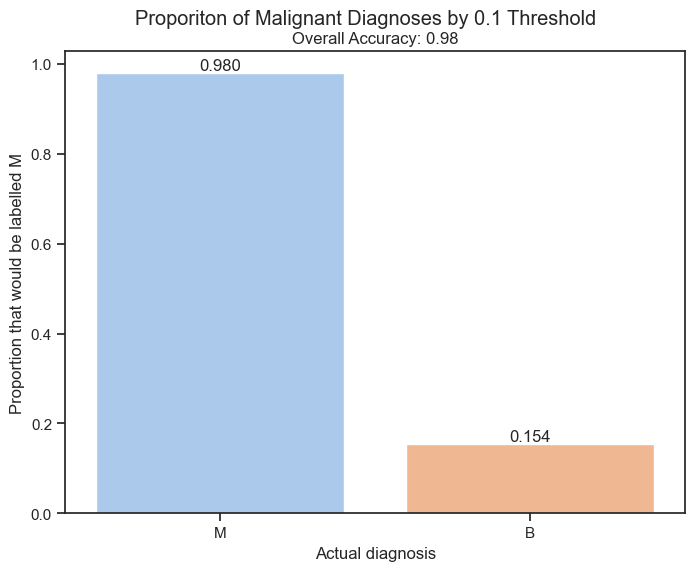

In [48]:
expanded_test_predictions = expanded_model.predict(original_X_test_scaled)
expanded_test_prediction_probs = expanded_model.predict_proba(original_X_test_scaled)

expanded_test_prediction_df = pd.DataFrame({'diagnosis': original_y_test, 
                                    'prediction' : expanded_test_predictions,
                                    'M_probability': [x[1] for x in expanded_test_prediction_probs],
                                    'prediction_probability': [np.max([x[0], x[1]]) for x in expanded_test_prediction_probs],
                                    'is_above_10_percent': [x[1] > 0.1 for x in expanded_test_prediction_probs]})

fig, ax = plt.subplots(figsize=(8, 6))
bars = sns.barplot(data=expanded_test_prediction_df, x='diagnosis', 
                   y='is_above_10_percent', hue='diagnosis', ax=ax, errorbar=None)
ax.bar_label(bars.containers[0], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
ax.bar_label(bars.containers[1], fmt='%.3f') # fmt can format the number, e.g., '%.2f' for two decimal places
plt.xlabel('Actual diagnosis')
plt.ylabel('Proportion that would be labelled M')
plt.suptitle('Proporiton of Malignant Diagnoses by 0.1 Threshold', y=0.95)
plt.title(f'Overall Accuracy: \
{round(accuracy_score(original_y_test, expanded_test_predictions, normalize=True, sample_weight=None), 2)}')
plt.show()

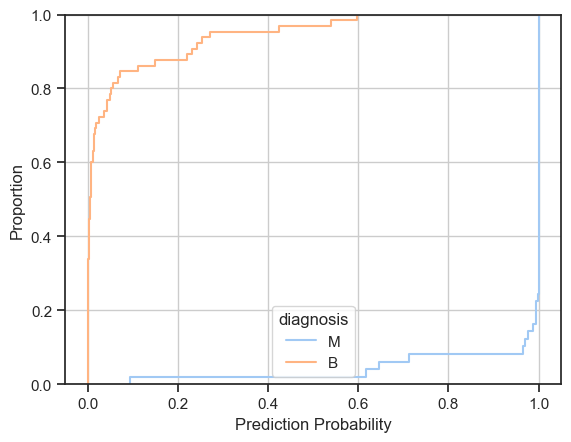

In [46]:
sns.ecdfplot(data=expanded_test_prediction_df,
             x='M_probability', hue='diagnosis')
plt.xlabel('Prediction Probability')
plt.grid(True)
plt.show()